In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import wrangle

More info on air quality (idea is to make a level of air quality)
- https://forum.airnowtech.org/t/the-aqi-equation/169
- https://forum.airnowtech.org/t/aqi-calculations-overview-ozone-pm2-5-and-pm10/168
- https://www.airnow.gov/aqi/aqi-basics/
- https://fit.thequint.com/health-news/explaining-air-quality-index#read-more
- https://www.airnow.gov/sites/default/files/2020-05/aqi-technical-assistance-document-sept2018.pdf
- https://www.epa.gov/sites/production/files/2014-05/documents/zell-aqi.pdf
- 

In [2]:
air = pd.read_csv('downtown_air.csv')

In [3]:
air = wrangle.clean_air(air)
air.head(1)

,datetime,Zone,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,alert_triggered,...,AQI_pm2_5,Pm_25_24hr,AQI_pm_25_24hr,AQI_pm10,Pm_10_24hr,AQI_pm10_24hr,unhealthy_alert,sensitive_alert,hypothetical_unhealthy_alert,hypothetical_sensitive_alert
0,2021-05-20 00:01:27,Downtown,7,6,8,0,0,0,0,None,...,Good,4.119213,Good,Good,4.95081,Good,No Alert,No Alert,No Alert,No Alert


In [4]:
air.SO2.value_counts()

0     140388
1         80
26         1
Name: SO2, dtype: int64

In [5]:
air.alert_triggered.value_counts()

None     137232
pm2_5      1671
no2         989
so2         485
pm10         64
o3           24
co            4
Name: alert_triggered, dtype: int64

In [6]:
air.unhealthy_alert.value_counts()

No Alert    139802
Pm2_5          599
Pm10            64
CO               4
Name: unhealthy_alert, dtype: int64

In [7]:
air.hypothetical_unhealthy_alert.value_counts()

No Alert    114739
O3           24960
Pm2_5          599
SO2             81
Pm10            64
NO2             22
CO               4
Name: hypothetical_unhealthy_alert, dtype: int64

In [8]:
air.sensitive_alert.value_counts()

No Alert    138579
Pm2_5         1842
Pm10            44
CO               4
Name: sensitive_alert, dtype: int64

In [9]:
air.hypothetical_sensitive_alert.value_counts()

No Alert    113517
O3           24960
Pm2_5         1842
SO2             81
Pm10            44
NO2             21
CO               4
Name: hypothetical_sensitive_alert, dtype: int64

In [10]:
air_train, air_validate, air_test = wrangle.split_data(air)

___
# Explore Air Quality

### Questions we asked about air quality
- Are there spikes in air quality at certain times or days?
- Is air quality and water consumption worse on the weekends?
- How is the air quality after it floods?
- What type of weather has the best air quality?
- As air quality gets worse water consumption goes up.
- Does air quality influence water consumption?

In [11]:
air.head(1)

,datetime,Zone,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,alert_triggered,...,AQI_pm2_5,Pm_25_24hr,AQI_pm_25_24hr,AQI_pm10,Pm_10_24hr,AQI_pm10_24hr,unhealthy_alert,sensitive_alert,hypothetical_unhealthy_alert,hypothetical_sensitive_alert
0,2021-05-20 00:01:27,Downtown,7,6,8,0,0,0,0,None,...,Good,4.119213,Good,Good,4.95081,Good,No Alert,No Alert,No Alert,No Alert



## Univariate Exploration

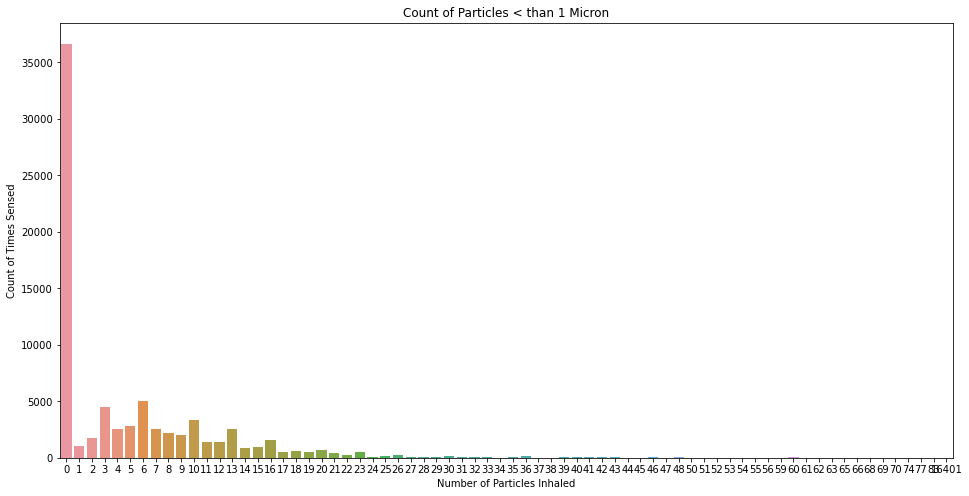

In [12]:
plt.figure(figsize=(16,8))
sns.countplot(data=air_train, x='Pm1_0')
plt.title('Count of Particles < than 1 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

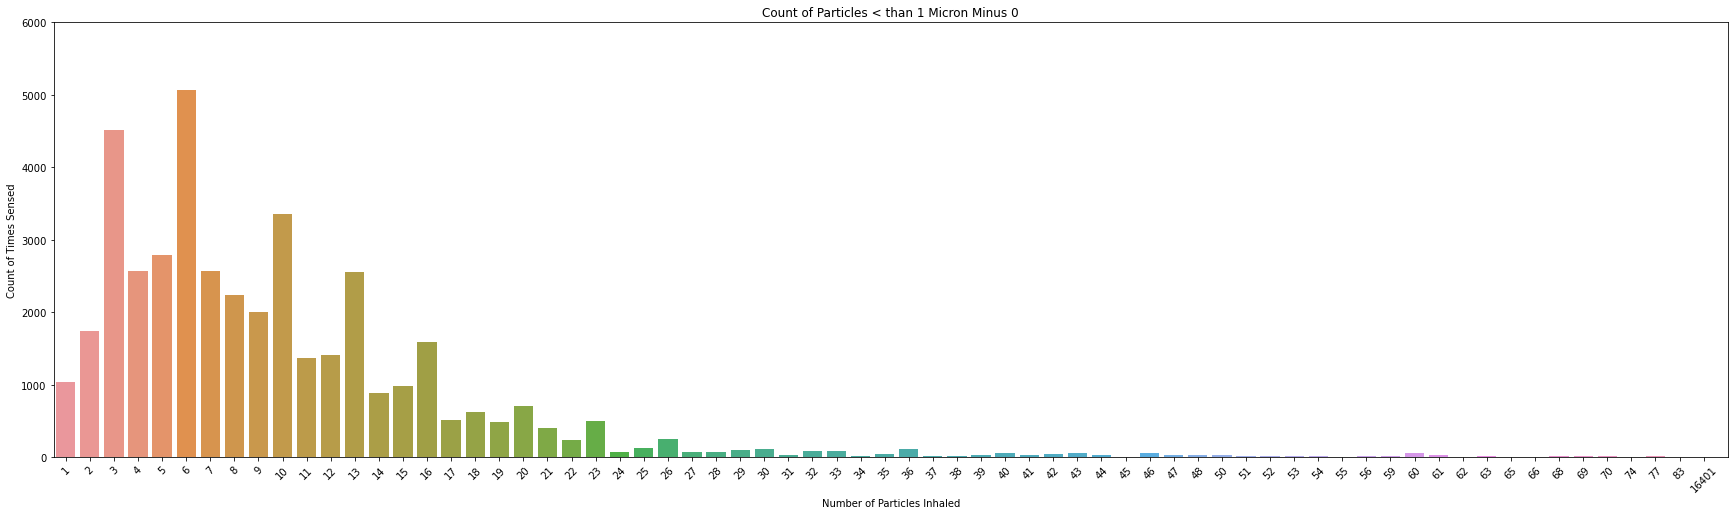

In [13]:
plt.figure(figsize=(30,8))
plot = sns.countplot(data=air_train, x='Pm1_0')
plot.set(xlim=(0.5, 70))
plot.set(ylim=(0, 6000))
plt.xticks(rotation=45)
plt.title('Count of Particles < than 1 Micron Minus 0')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

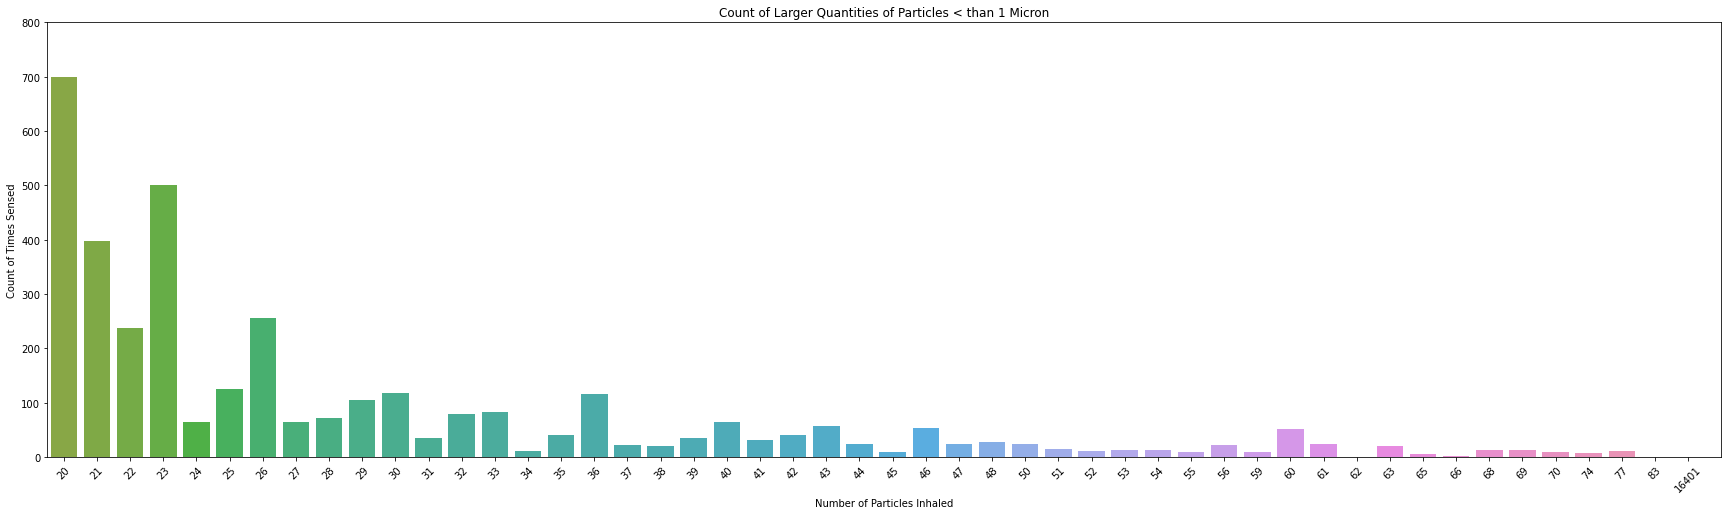

In [14]:
plt.figure(figsize=(30,8))
plot = sns.countplot(data=air_train, x='Pm1_0')
plot.set(xlim=(19.5, 70))
plot.set(ylim=(0, 800))
plt.xticks(rotation=45)
plt.title('Count of Larger Quantities of Particles < than 1 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

### Takeaways:
- Top 5 readings are at 0, 3, 6, 10, and 5
- The higher the reading the less often it is being read
- When looking closer at the higher reading you can see small spikes at 23, 26, 36, 46, and 60
    - keep in mind these are only being considered "spikes" when also looking at the surrounding reading totals.
___

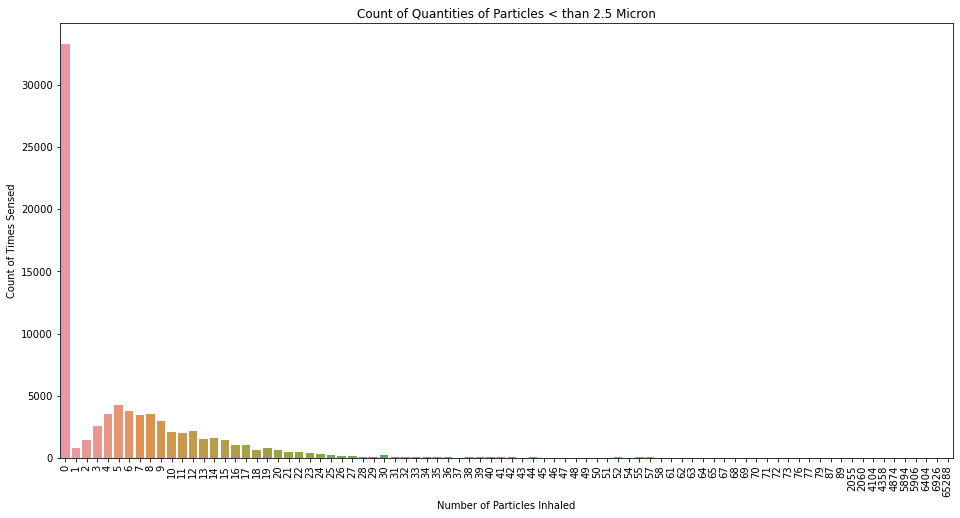

In [15]:
plt.figure(figsize=(16,8))
sns.countplot(data=air_train, x='Pm2_5')
plt.xticks(rotation=90)
plt.title('Count of Quantities of Particles < than 2.5 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

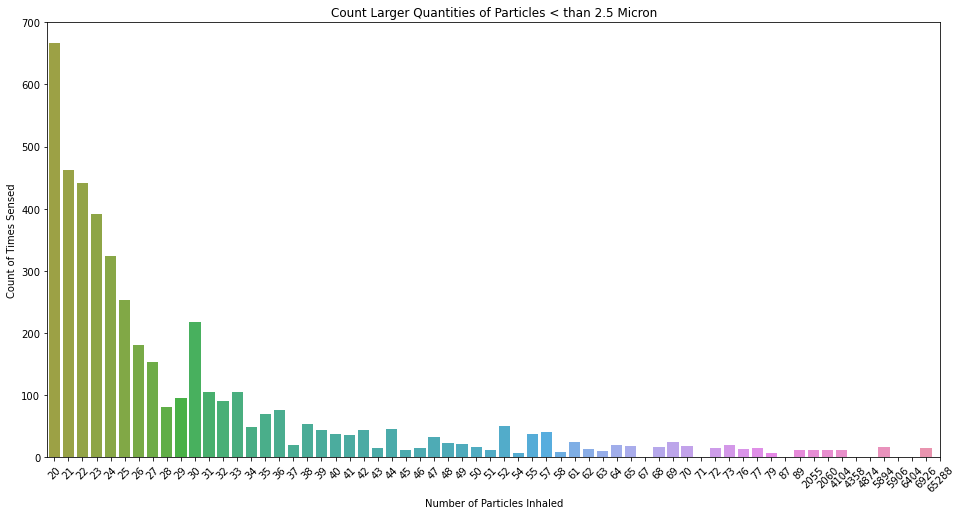

In [16]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air_train, x='Pm2_5')
plot.set(xlim=(19.5, 83))
plot.set(ylim=(0, 700))
plt.xticks(rotation=45)
plt.title('Count Larger Quantities of Particles < than 2.5 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

### Takeaways:
- Top 5 readings are at 0, 5, 6, 4, and 7
- The higher the reading the less often it is being read
- when looking closer at the higher reading you can see small spikes throughout but mostly at:
    - 30, 52, 55, and 57

___

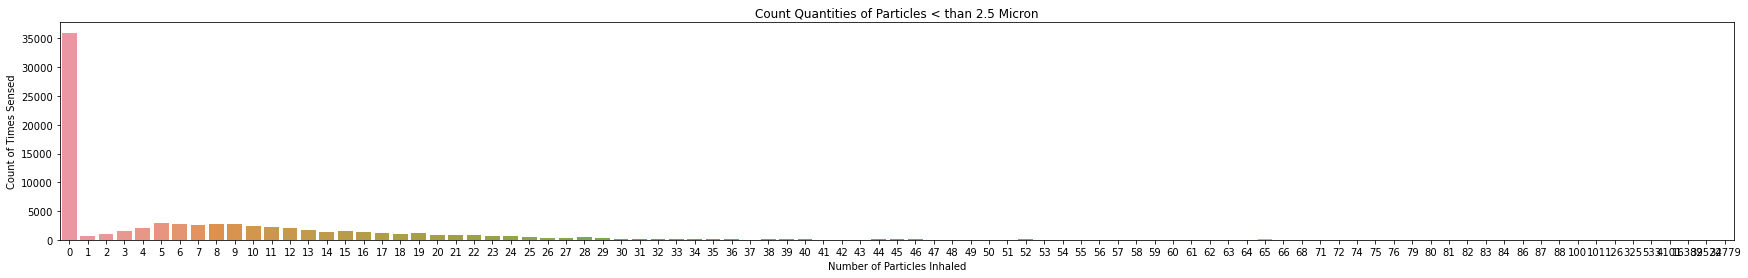

In [17]:
plt.figure(figsize=(30,4))
sns.countplot(data=air_train, x='Pm10')
plt.title('Count Quantities of Particles < than 2.5 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

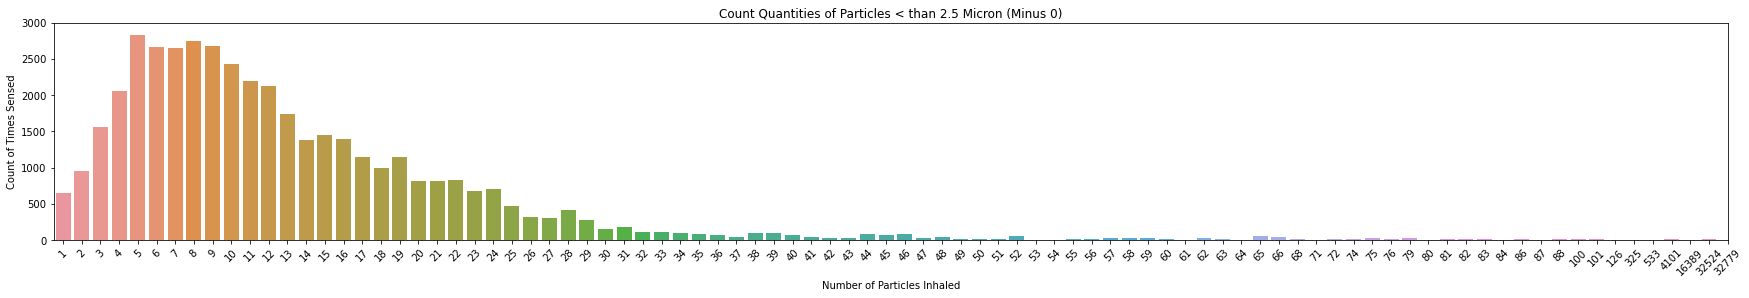

In [18]:
plt.figure(figsize=(30,4))
plot = sns.countplot(data=air_train, x='Pm10')
plot.set(xlim=(0.5, 90))
plot.set(ylim=(0, 3000))
plt.xticks(rotation=45)
plt.title('Count Quantities of Particles < than 2.5 Micron (Minus 0)')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

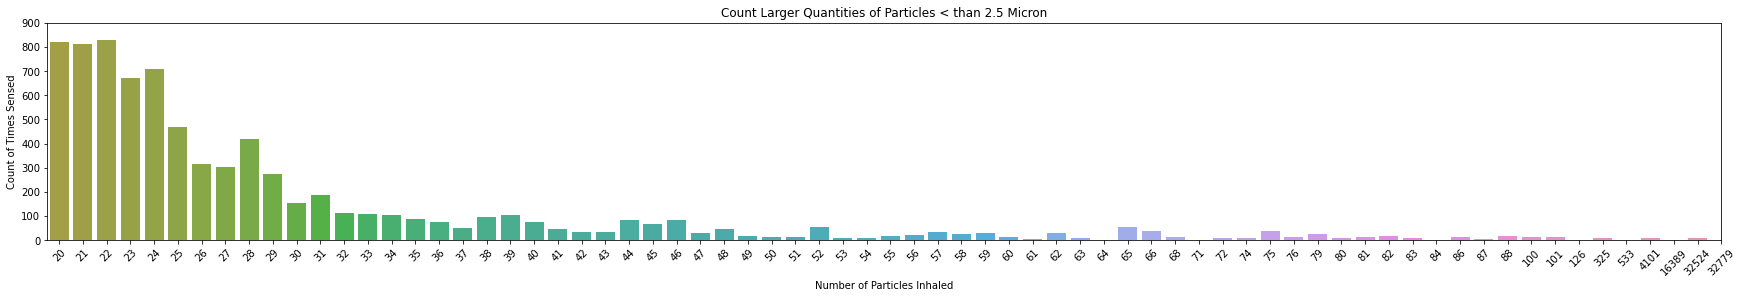

In [19]:
plt.figure(figsize=(30,4))
plot = sns.countplot(data=air_train, x='Pm10')
plot.set(xlim=(19.5, 90))
plot.set(ylim=(0, 900))
plt.xticks(rotation=45)
plt.title('Count Larger Quantities of Particles < than 2.5 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

In [20]:
air_train.Pm10.value_counts()

0        35996
5         2837
8         2751
9         2680
6         2667
         ...  
71           1
84           1
16389        1
64           1
533          1
Name: Pm10, Length: 91, dtype: int64

### Takeaways:
- Top 5 readings are at 0, 5, 8, 9, and 6
- The higher the reading the less often it is being read
- when looking closer at the higher reading you can see small spikes throughout
___

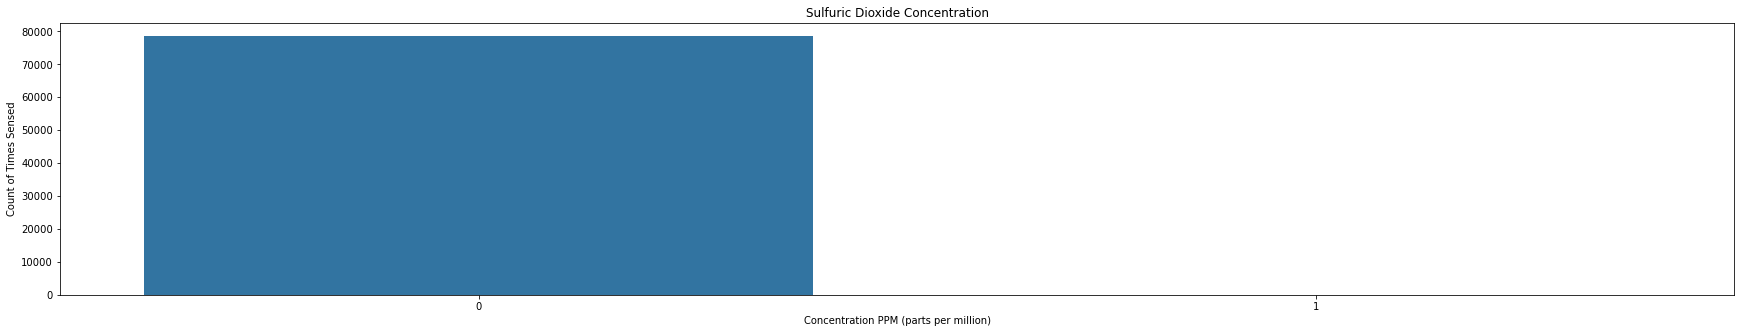

In [21]:
plt.figure(figsize=(30,5))
sns.countplot(data=air_train, x='SO2')
plt.title('Sulfuric Dioxide Concentration')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

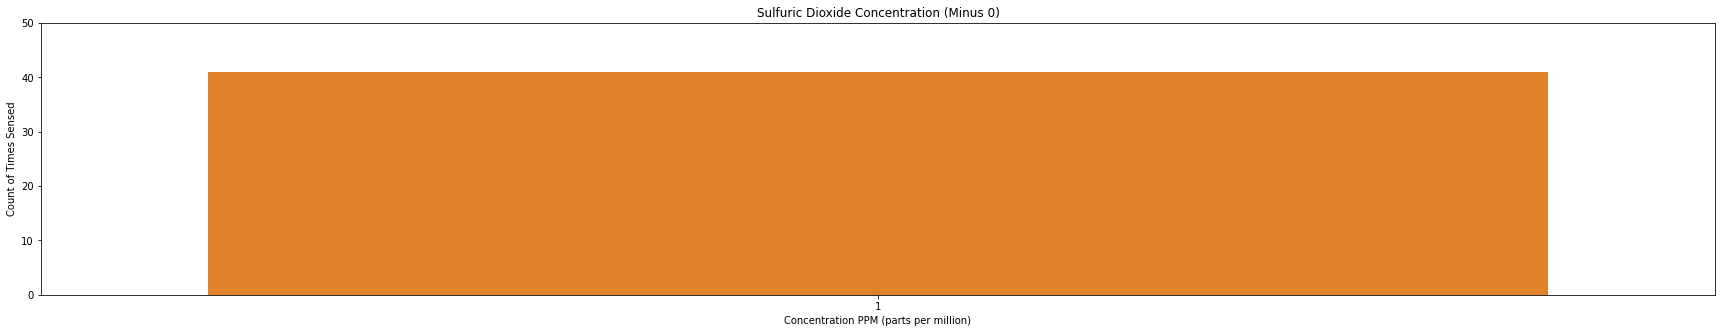

In [22]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='SO2')
plot.set(xlim=(0.5, 1.5))
plot.set(ylim=(0, 50))
plt.title('Sulfuric Dioxide Concentration (Minus 0)')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

In [23]:
air.SO2.value_counts()

0     140388
1         80
26         1
Name: SO2, dtype: int64

### Takeaways:
- There are barley and readings outside of 0 for SO2
    - 80 readings for 1
        - 0.0569% of readings
    - 1 reading for 26
        - 0.0007% of readings

___

Text(0, 0.5, 'Count of Times Sensed')

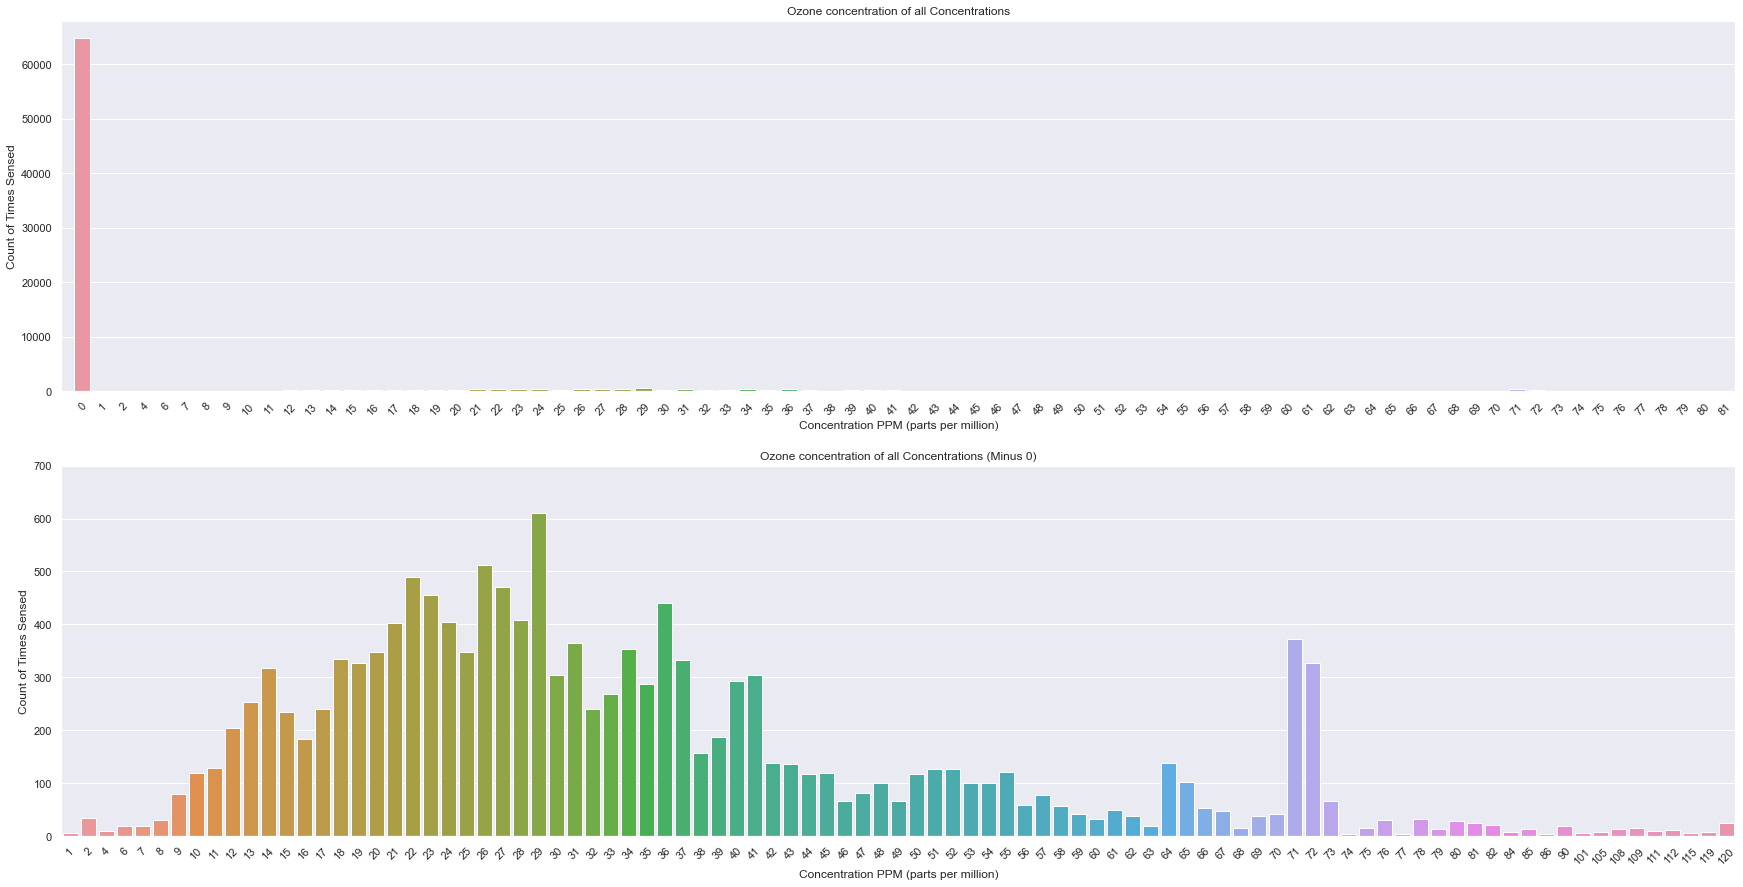

In [24]:
plt.subplots(2,1, figsize=(30,15), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
plot = sns.countplot(data=air_train, x='O3')
plot.set(xlim=(-1, 79.5))
plt.xticks(rotation=45)
plt.title('Ozone concentration of all Concentrations')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

plt.subplot(2,1,2)
plot = sns.countplot(data=air_train, x='O3')
plot.set(xlim=(0.5, 93.5))
plot.set(ylim=(0, 700))
plt.xticks(rotation=45)
plt.title('Ozone concentration of all Concentrations (Minus 0)')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

In [25]:
air_train.O3.value_counts()

0      64715
29       611
26       513
22       489
27       470
       ...  
115        6
1          6
74         5
77         5
86         4
Name: O3, Length: 94, dtype: int64

### Takeaways:
- Top 5 readings are at 0, 0.1, 36.3125, 26, and 23.6875
- There are MAJOR spikes in the higher concentration ranges
- There is no obvius trend based on this data
___ 

Text(0, 0.5, 'Count of Times Sensed')

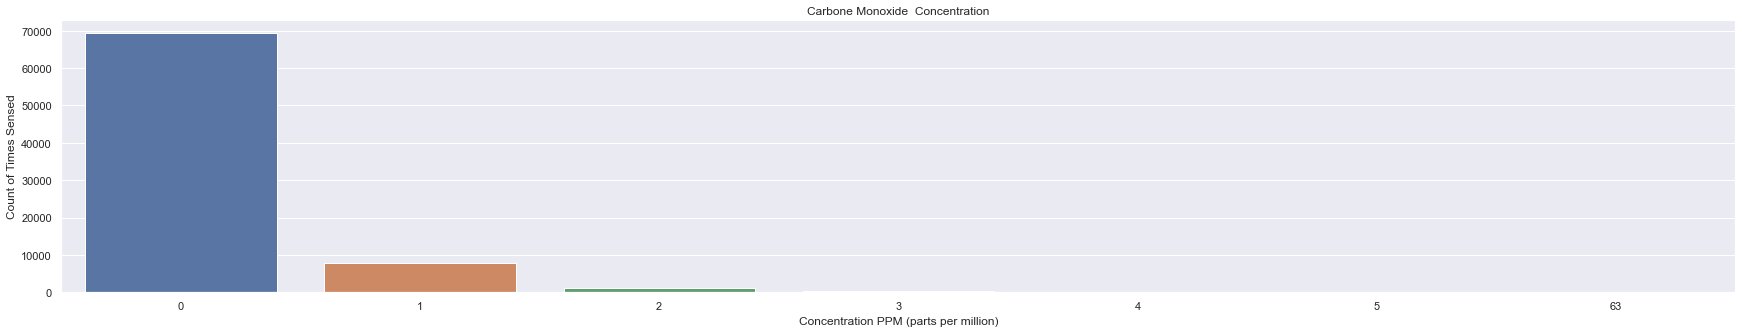

In [26]:
plt.figure(figsize=(30,5))
sns.countplot(data=air_train, x='CO')
plt.title('Carbone Monoxide  Concentration')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

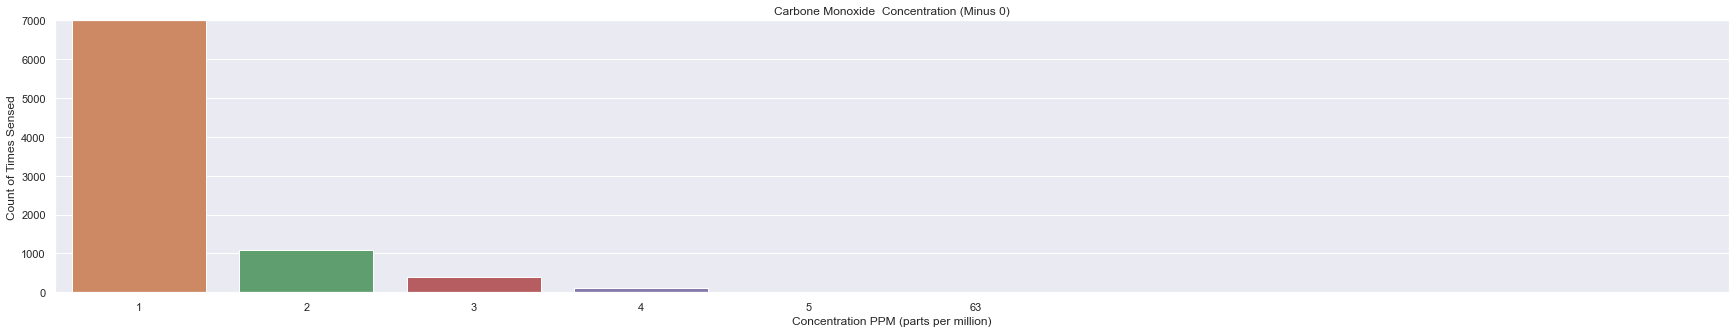

In [27]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='CO')
plot.set(xlim=(0.5, 10.5))
plot.set(ylim=(0, 7000))
plt.title('Carbone Monoxide  Concentration (Minus 0)')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

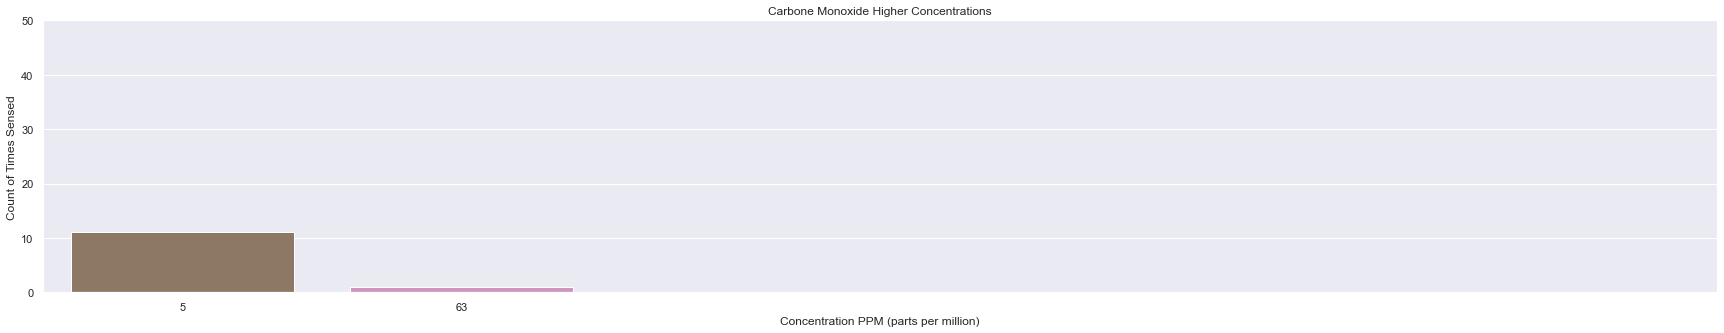

In [28]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='CO')
plot.set(xlim=(4.5, 10.5))
plot.set(ylim=(0, 50))
plt.title('Carbone Monoxide Higher Concentrations')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

In [29]:
air_train.CO.value_counts()

0     69297
1      7761
2      1078
3       394
4       120
5        11
63        1
Name: CO, dtype: int64

### Takeaways:
- The higher the concentration the lower the amount of times it has been recorded.
- There is a constant downwards trend

___

Text(0, 0.5, 'Count of Times Sensed')

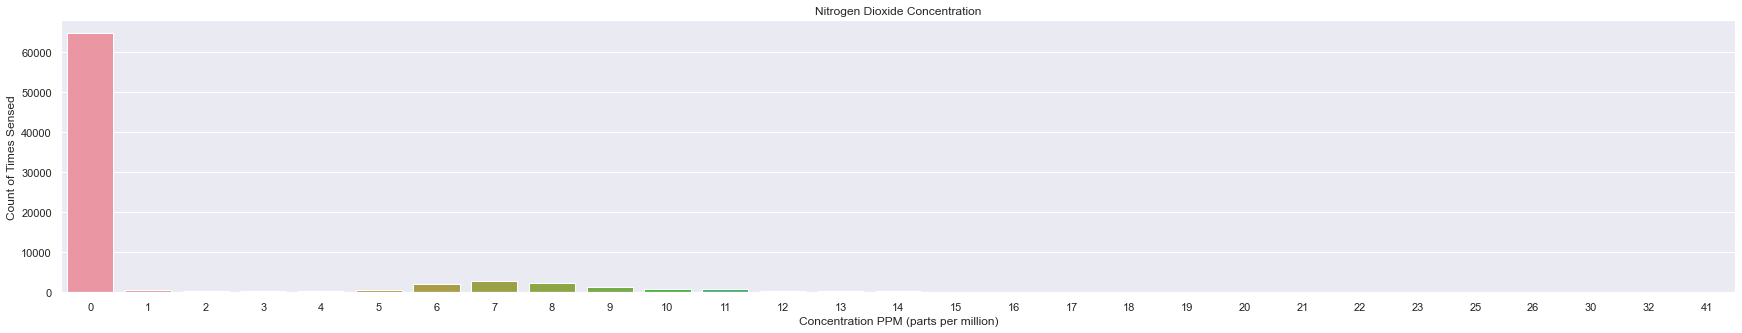

In [30]:
plt.figure(figsize=(30,5))
sns.countplot(data=air_train, x='NO2')
plt.title('Nitrogen Dioxide Concentration')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

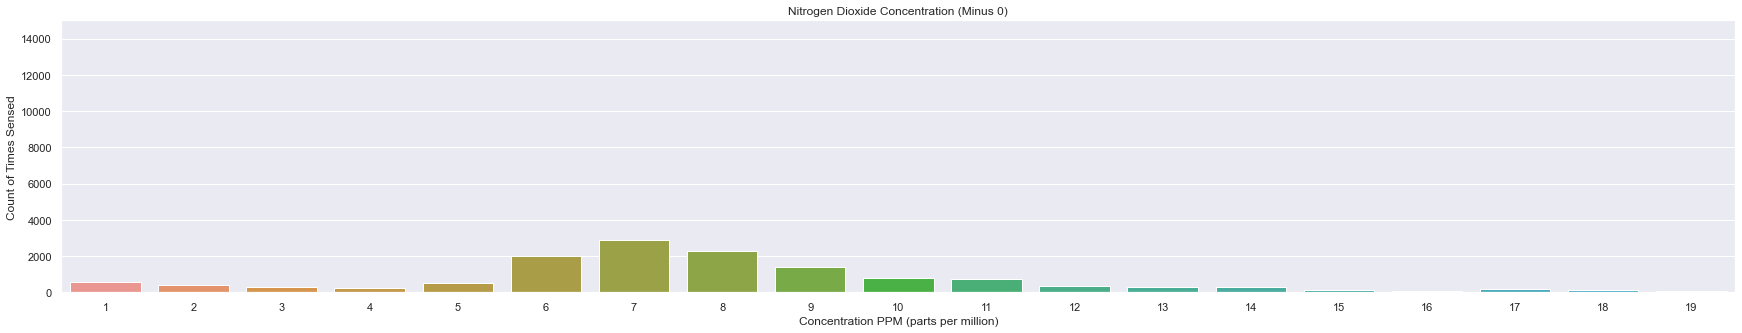

In [31]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='NO2')
plot.set(xlim=(0.5, 19.5))
plot.set(ylim=(0, 15000))
plt.title('Nitrogen Dioxide Concentration (Minus 0)')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

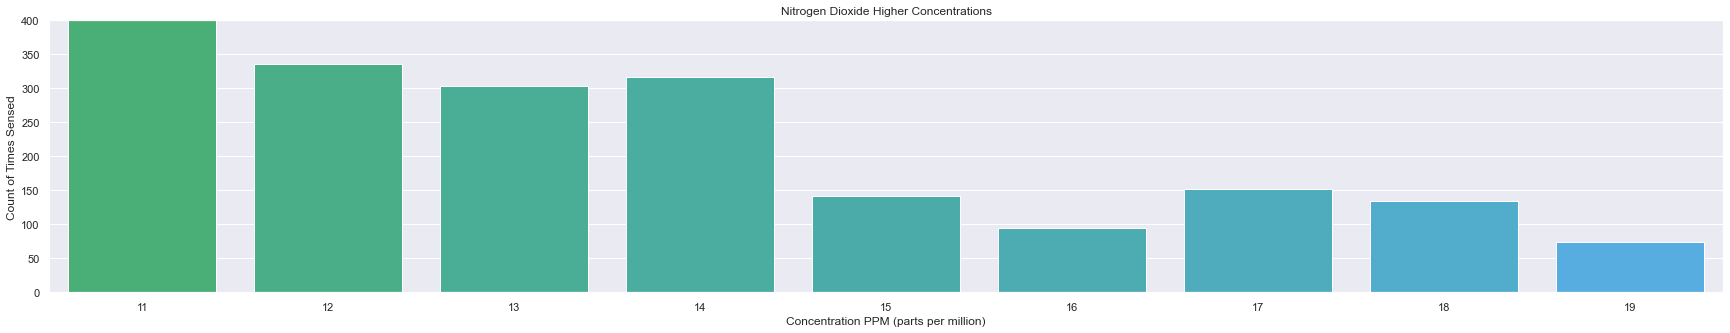

In [32]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='NO2')
plot.set(xlim=(10.5, 19.5))
plot.set(ylim=(0, 400))
plt.title('Nitrogen Dioxide Higher Concentrations')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

### Takeaways:
- Top 5 readings are at 0, 1, 7, 6, and 8
- steady spike from concentration of 5-10

___

Text(0, 0.5, 'Number of Times it Tiggered an Alert')

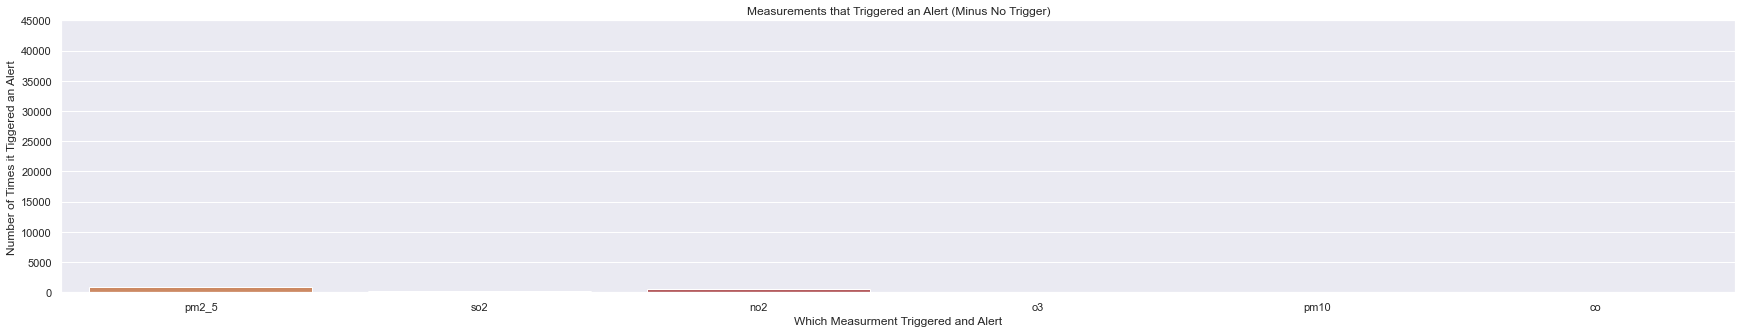

In [33]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='alert_triggered')
plot.set(xlim=(0.5, 6.5))
plot.set(ylim=(0, 45000))
plt.title('Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')

In [34]:
air_train.alert_triggered.value_counts()

None     76880
pm2_5      923
no2        543
so2        272
pm10        31
o3          12
co           1
Name: alert_triggered, dtype: int64

### Takeaways:
- Nitrogen Dioxide mostly contributes to being a trigger.
___

Text(0.5, 1.0, 'Sales Amount by Weekday')

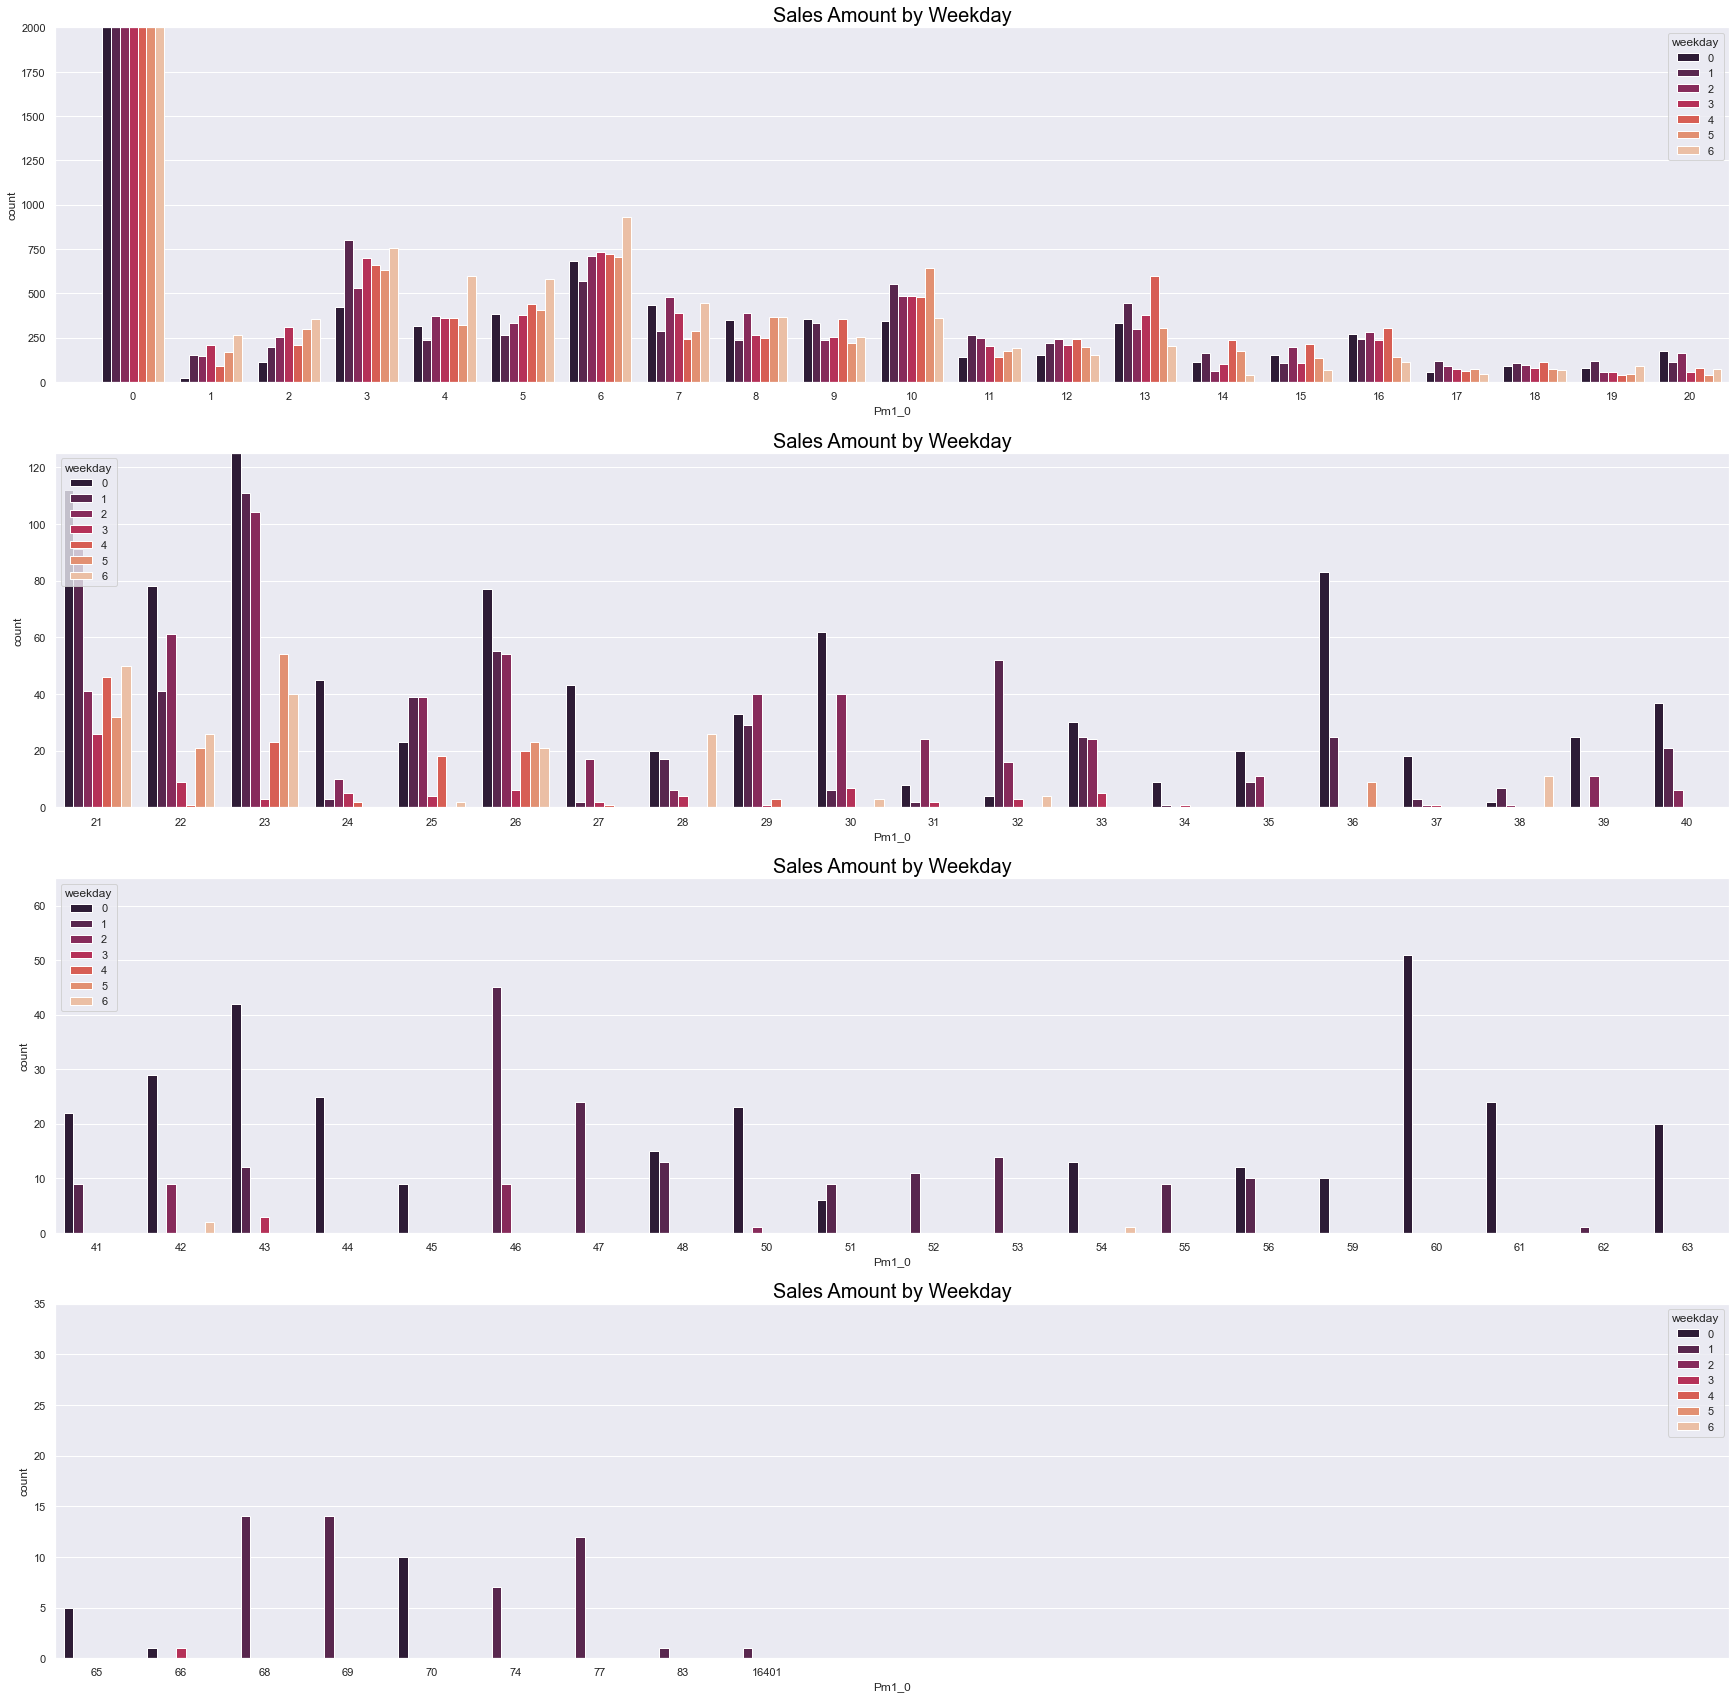

In [35]:
plt.subplots(4,1, figsize=(30,30), sharey=True)
sns.set(style="darkgrid")

plt.subplot(4,1,1)
plot = sns.countplot(data = air_train, hue='weekday', x = 'Pm1_0', palette='rocket')
plot.set(xlim=(-1, 20.5))
plot.set(ylim=(0, 2000))
plt.title('Sales Amount by Weekday', size=20, color='black')

plt.subplot(4,1,2)
plot = sns.countplot(data = air_train, hue='weekday', x = 'Pm1_0', palette='rocket')
plot.set(xlim=(20.5, 40.5))
plot.set(ylim=(0, 125))
plt.title('Sales Amount by Weekday', size=20, color='black')

plt.subplot(4,1,3)
plot = sns.countplot(data = air_train, hue='weekday', x = 'Pm1_0', palette='rocket')
plot.set(xlim=(40.5, 60.5))
plot.set(ylim=(0, 65))
plt.title('Sales Amount by Weekday', size=20, color='black')

plt.subplot(4,1,4)
plot = sns.countplot(data = air_train, hue='weekday', x = 'Pm1_0', palette='rocket')
plot.set(xlim=(60.5, 80.5))
plot.set(ylim=(0, 35))
plt.title('Sales Amount by Weekday', size=20, color='black')

### Takeaways:
- Weekday
    - 0 = Monday
    - 1 = Tuesday
    - 2 = Wednesday
    - 3 = Thursday
    - 4 = Friday
    - 5 = Saturday
    - 6 = Sunday
- PM 10 Concentration readings higher then 40 usually are being picked up earlier in the work week.
___

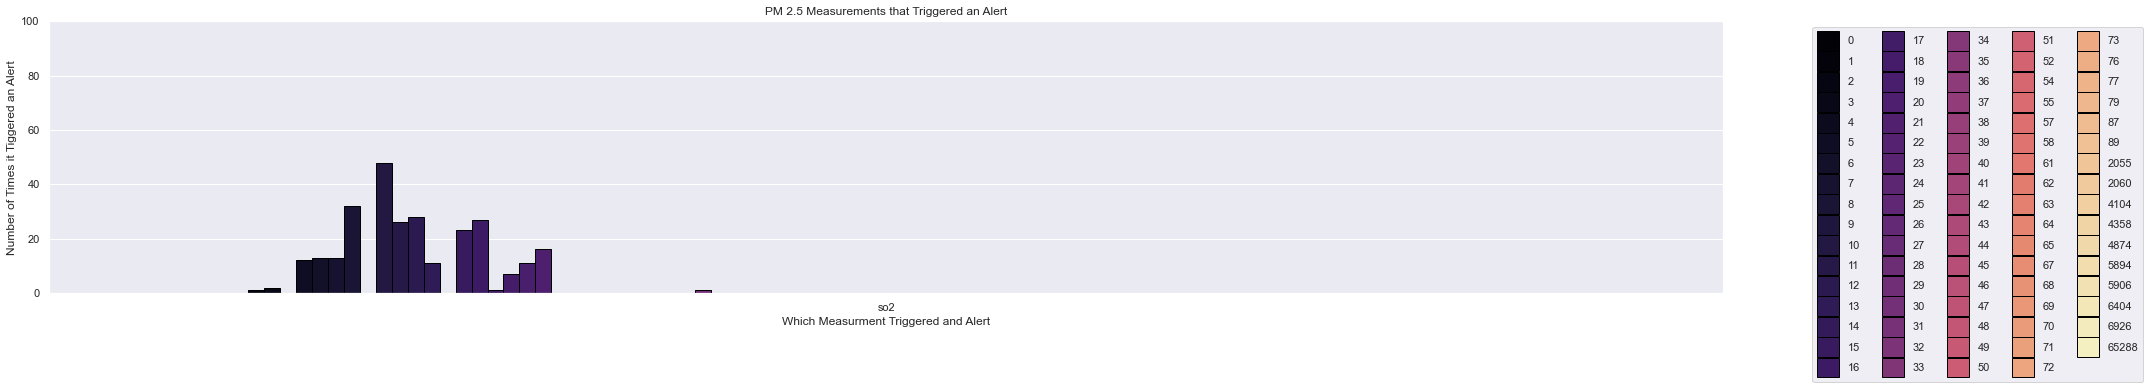

In [36]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='Pm2_5', palette='magma',edgecolor='black')
plot.set(xlim=(1.5, 2.5))
plot.set(ylim=(0, 100))
plt.title('PM 2.5 Measurements that Triggered an Alert')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=5,handleheight=2.4, labelspacing=0.05)

### Takeaways:
- Whats up with this gap between 69 and 82?
    - all of the readings in the legend are actual readigs so why are these higher concentrations not triggering an alert?
___

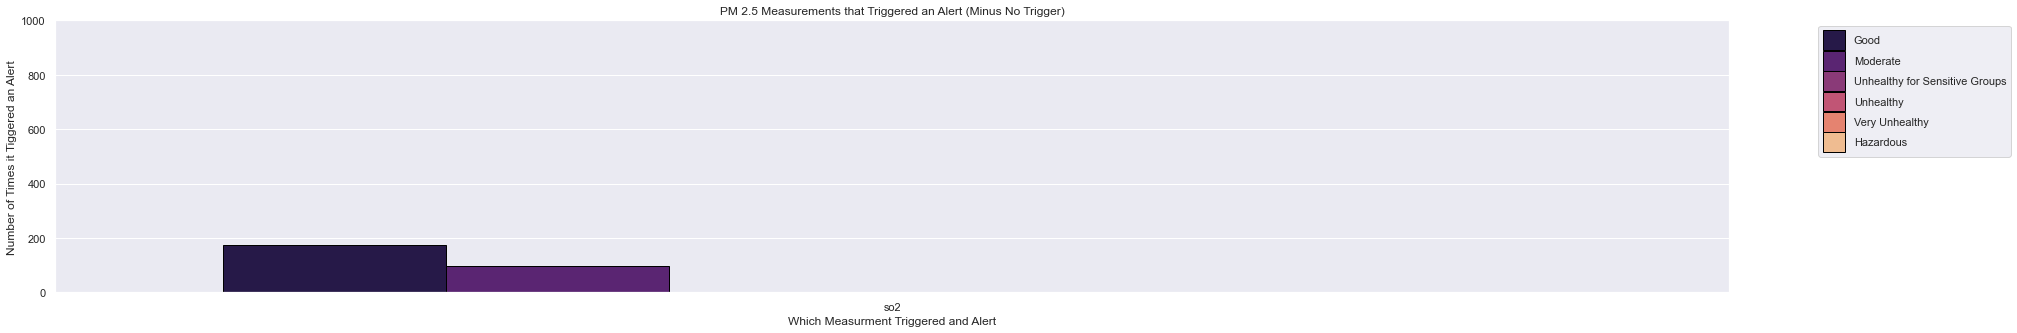

In [37]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='AQI_pm2_5', palette='magma',edgecolor='black')
plot.set(xlim=(1.5, 2.5))
plot.set(ylim=(0, 1000))
plt.title('PM 2.5 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

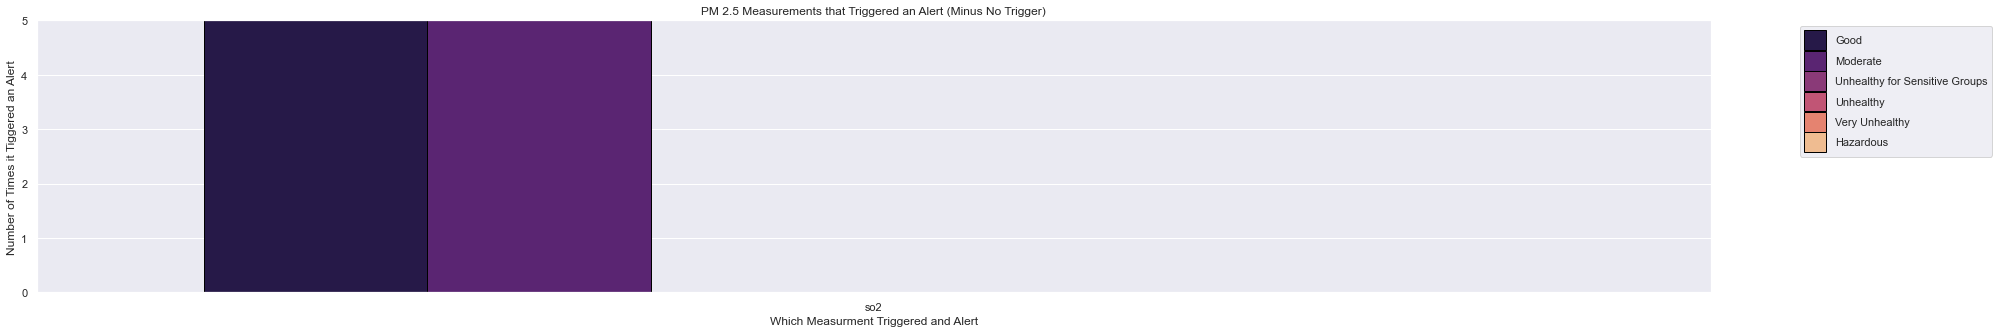

In [38]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='AQI_pm2_5', palette='magma',edgecolor='black')
plot.set(xlim=(1.5, 2.5))
plot.set(ylim=(0, 5))
plt.title('PM 2.5 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

In [39]:
air.AQI_pm2_5.value_counts()

Good                              117752
Moderate                           21005
Unhealthy for Sensitive Groups      1113
Unhealthy                            493
Hazardous                             40
Very Unhealthy                         0
Name: AQI_pm2_5, dtype: int64

### Takeaways:
- It seems like alert triggered is not picking up any of the hazardous readings
    - Hazerdous readings for pm 2.5 is anything above 250.5
        - there are 3 readings like this.
____

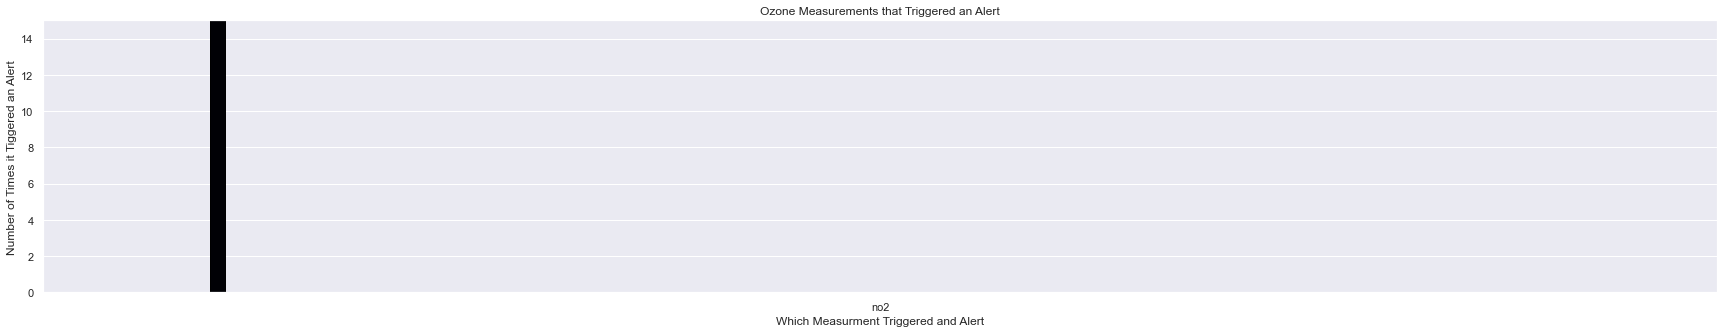

In [40]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='O3', palette='magma',edgecolor='black')
plot.set(xlim=(2.5, 3.5))
plot.set(ylim=(0, 15))
plt.title('Ozone Measurements that Triggered an Alert')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plot.legend_ = None

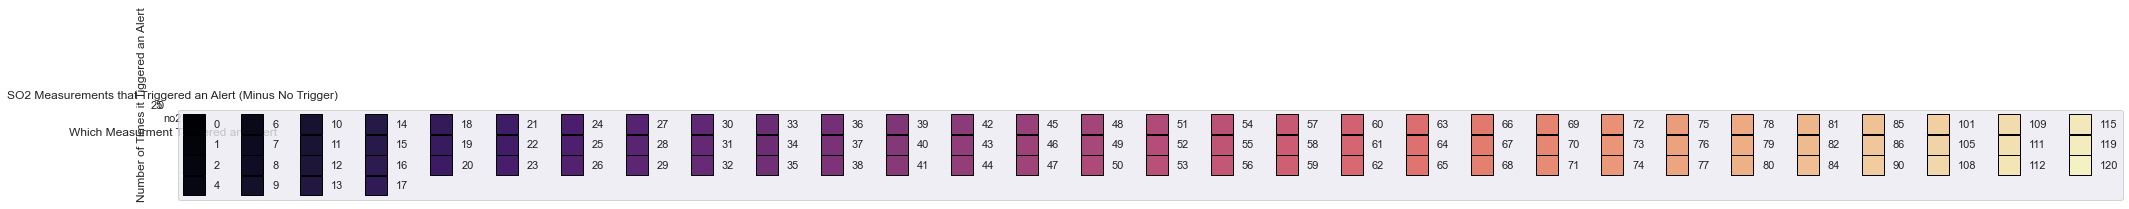

In [41]:
plt.figure(figsize=(0,0))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='O3', palette='magma',edgecolor='black')
plot.set(xlim=(2.5, 3.5))
plot.set(ylim=(0, 30))
plt.title('SO2 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=30,handleheight=2.4, labelspacing=0.05)


### Takeaways:
- Why are thie higher readings not triggering any alert?
    - this right from low to high on the x axis
___

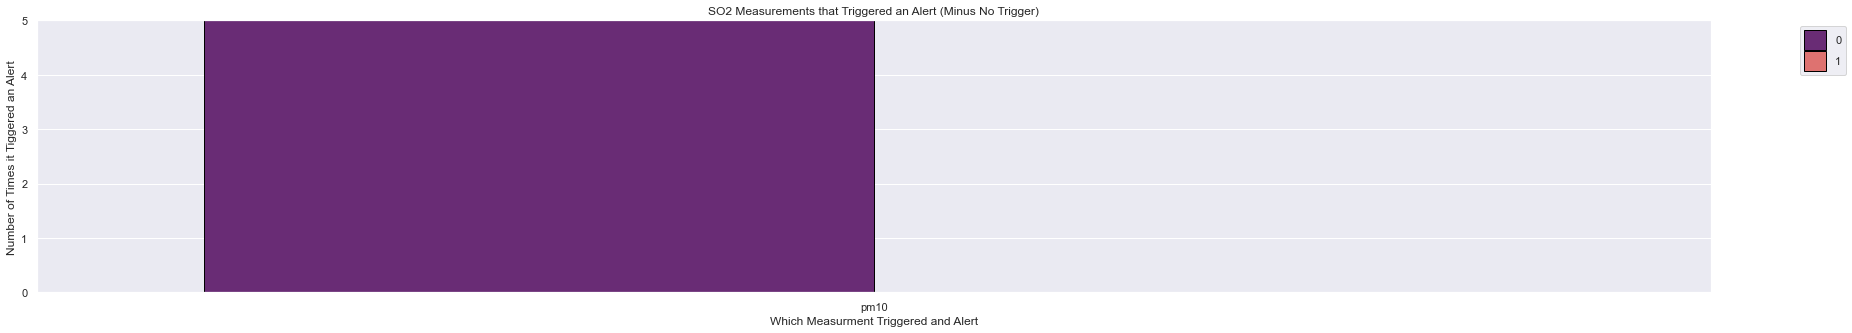

In [42]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='SO2', palette='magma',edgecolor='black')
plot.set(xlim=(4.5, 5.5))
plot.set(ylim=(0, 5))
plt.title('SO2 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

### Takeaways:
- Not enough data to gain any insight
___

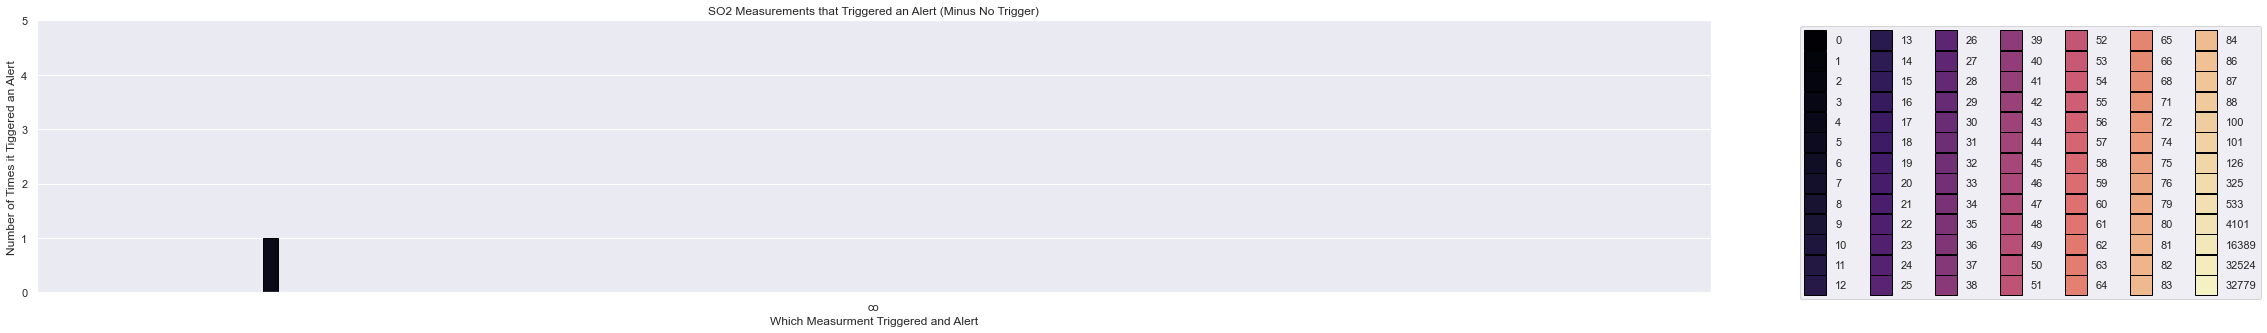

In [43]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='Pm10', palette='magma',edgecolor='black')
plot.set(xlim=(5.5, 6.5))
plot.set(ylim=(0, 5))
plt.title('SO2 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=7,handleheight=2.4, labelspacing=0.05)

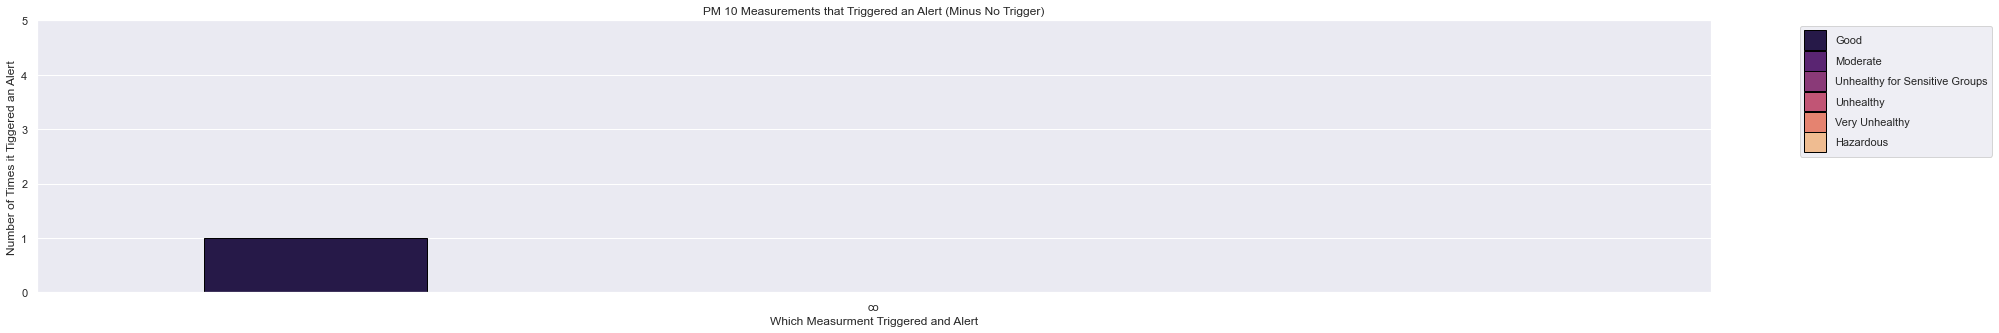

In [44]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='AQI_pm10', palette='magma',edgecolor='black')
plot.set(xlim=(5.5, 6.5))
plot.set(ylim=(0, 5))
plt.title('PM 10 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

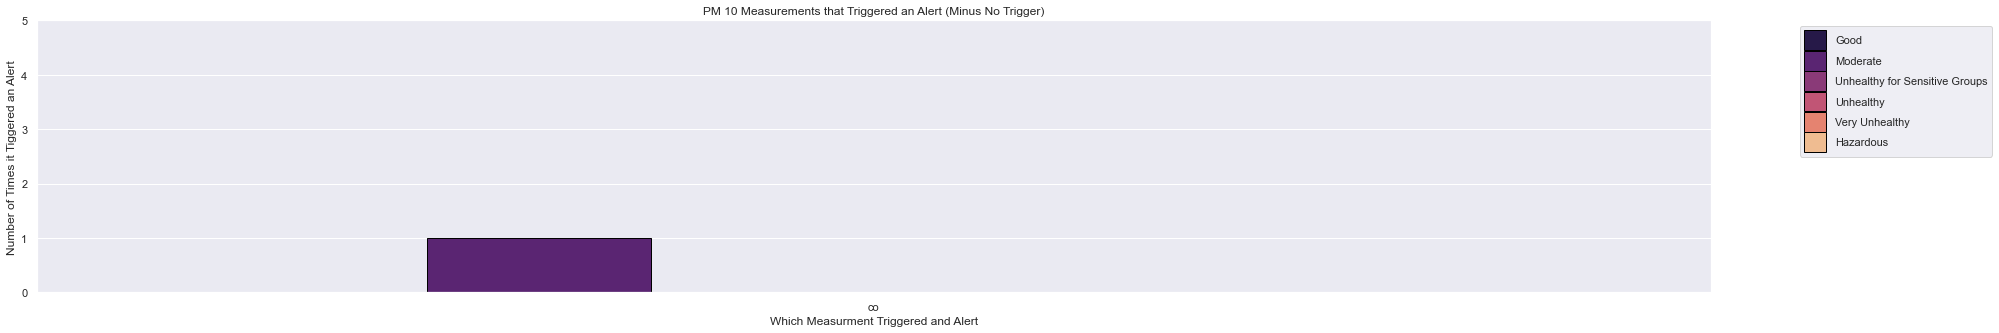

In [45]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='AQI_pm10_24hr', palette='magma',edgecolor='black')
plot.set(xlim=(5.5, 6.5))
plot.set(ylim=(0, 5))
plt.title('PM 10 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

In [46]:
air.AQI_pm10.value_counts()

Good                              139520
Moderate                             885
Unhealthy                             20
Hazardous                              1
Very Unhealthy                         0
Unhealthy for Sensitive Groups         0
Name: AQI_pm10, dtype: int64

In [47]:
air.AQI_pm10_24hr.value_counts()

Good                              137475
Very Unhealthy                      1728
Moderate                            1266
Hazardous                              0
Unhealthy                              0
Unhealthy for Sensitive Groups         0
Name: AQI_pm10_24hr, dtype: int64

### Takeaways:
- Pretty much nothing is triggering for PM 10
    - this makes sense since there are not readings above unhealthy for sensitive groups
___

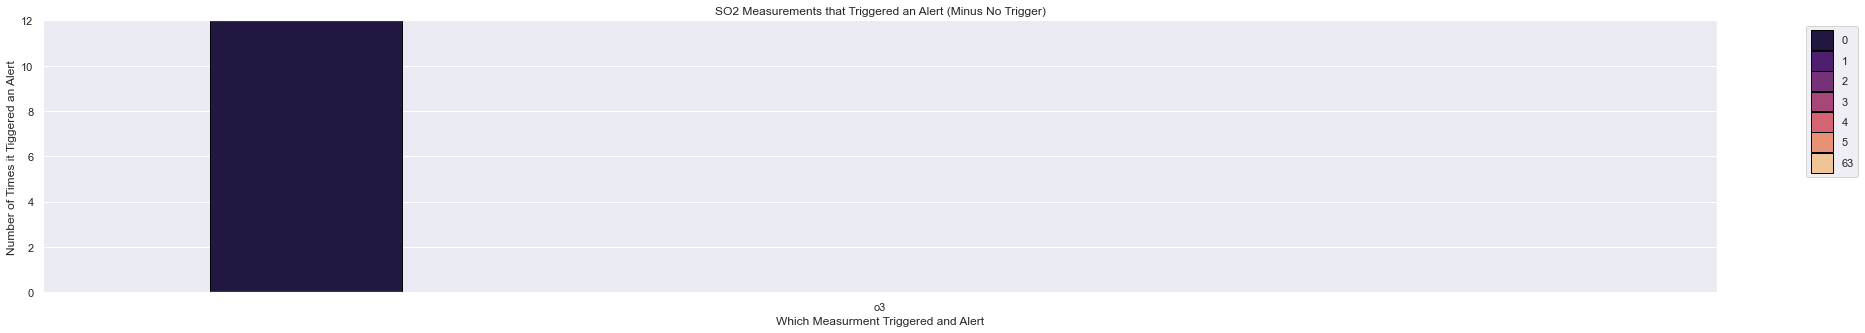

In [48]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='CO', palette='magma',edgecolor='black')
plot.set(xlim=(3.5, 4.5))
plot.set(ylim=(0, 12))
plt.title('SO2 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

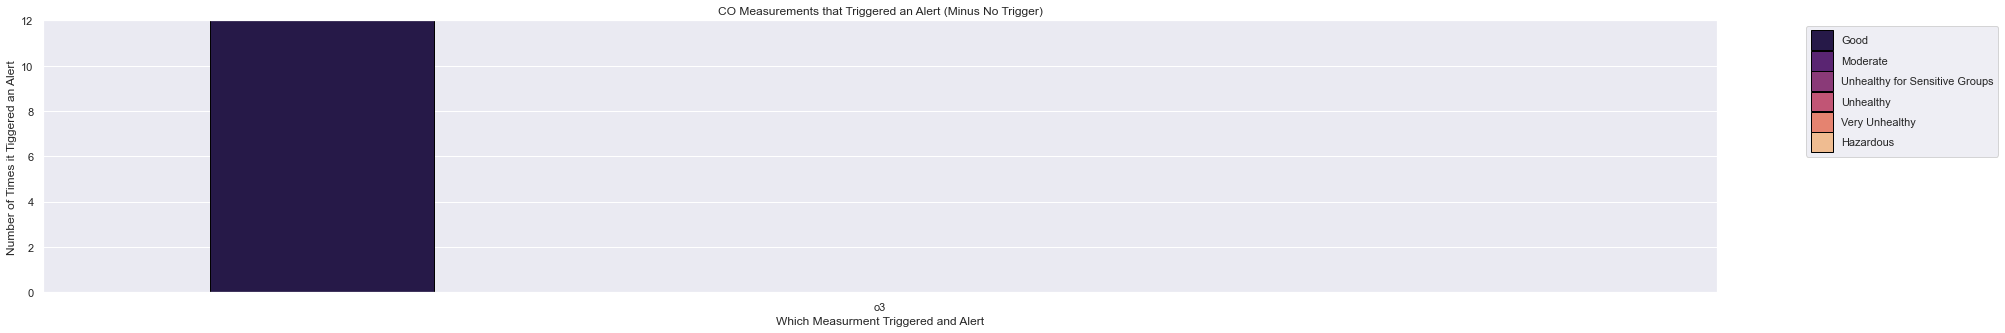

In [49]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='AQI_CO', palette='magma',edgecolor='black')
plot.set(xlim=(3.5, 4.5))
plot.set(ylim=(0, 12))
plt.title('CO Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

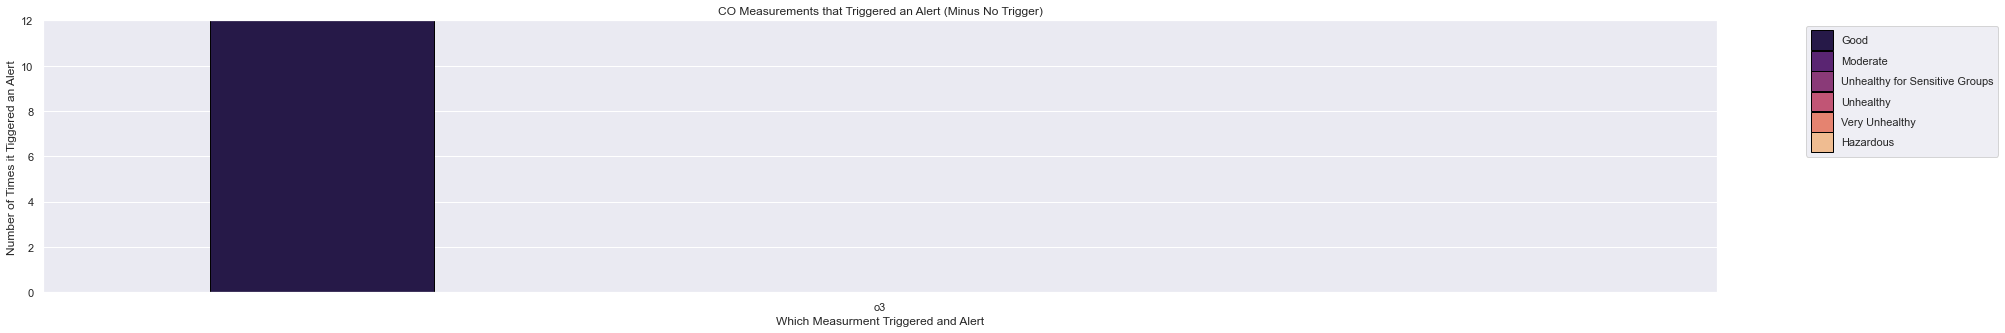

In [50]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='AQI_CO_24hr', palette='magma',edgecolor='black')
plot.set(xlim=(3.5, 4.5))
plot.set(ylim=(0, 12))
plt.title('CO Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

In [51]:
air.AQI_CO.value_counts()

Good                              140444
Moderate                              21
Hazardous                              4
Very Unhealthy                         0
Unhealthy                              0
Unhealthy for Sensitive Groups         0
Name: AQI_CO, dtype: int64

In [52]:
air.AQI_CO_24hr.value_counts()

Good                              140469
Hazardous                              0
Very Unhealthy                         0
Unhealthy                              0
Unhealthy for Sensitive Groups         0
Moderate                               0
Name: AQI_CO_24hr, dtype: int64

### Takeaways:
- Unhealthy is not causing a trigger?
___

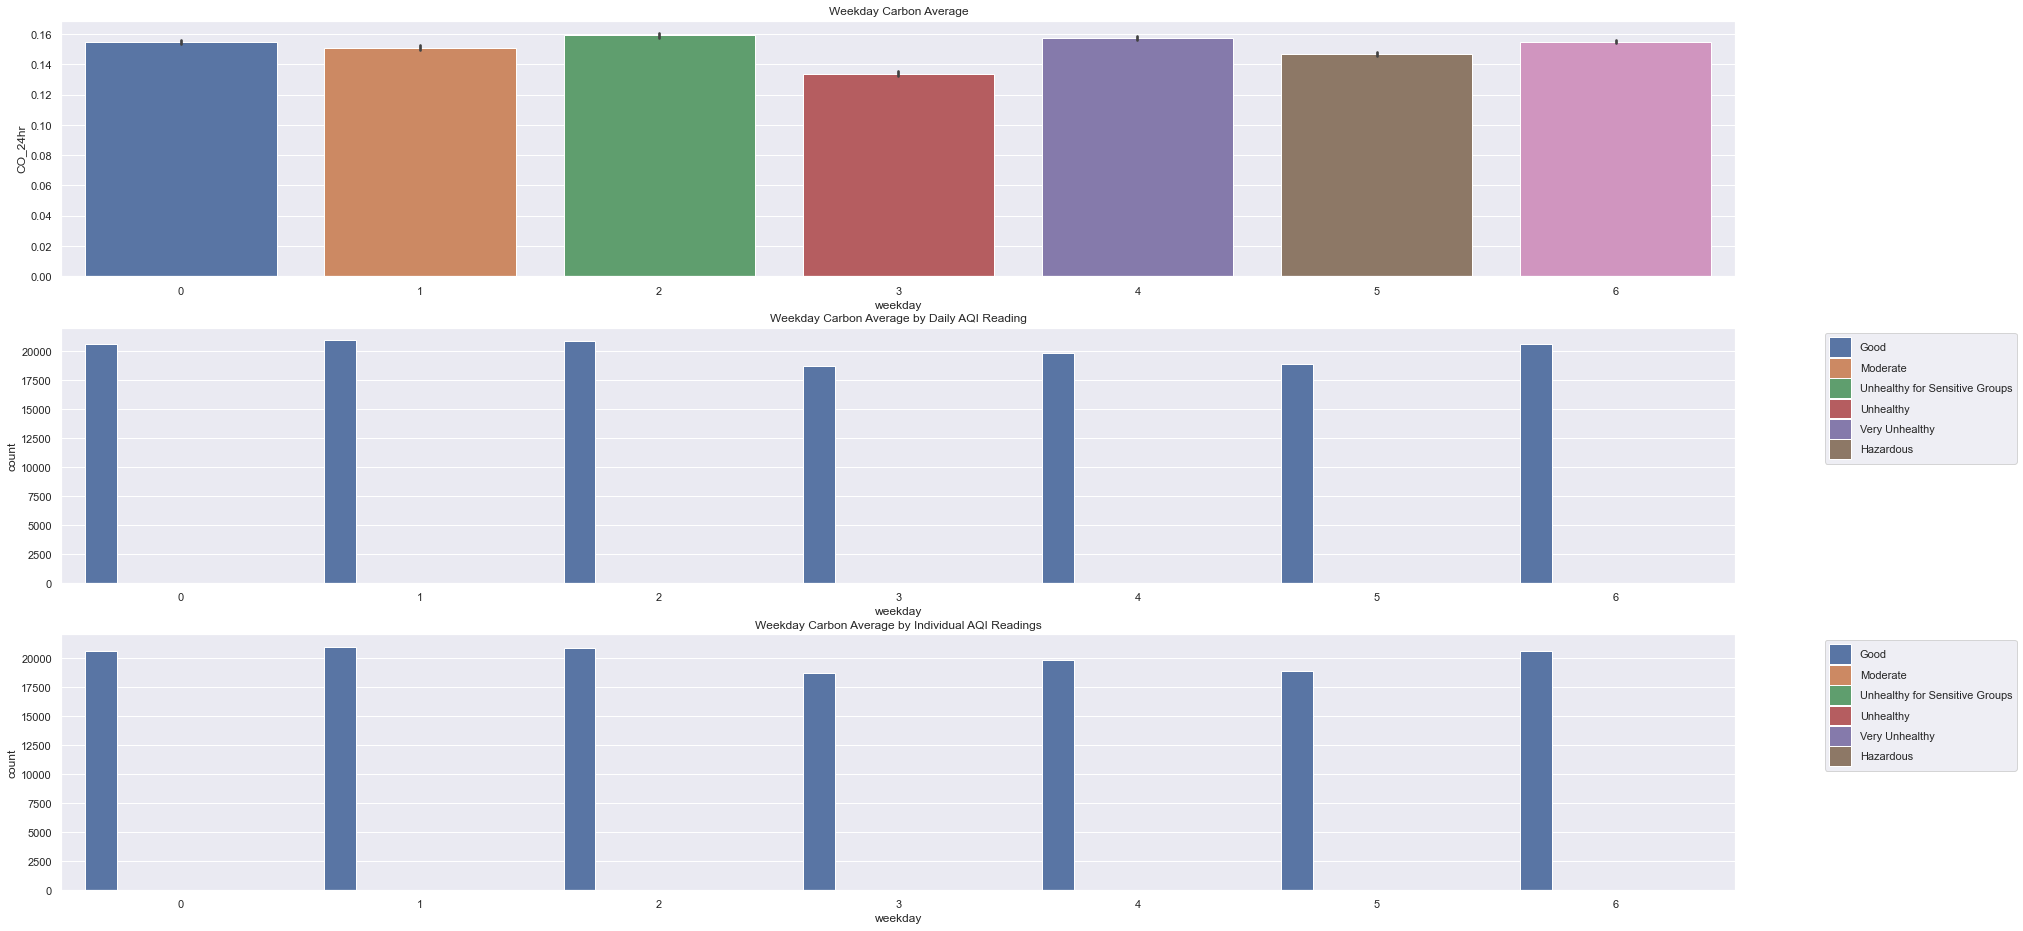

In [53]:
plt.subplots(3,1, figsize=(30,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(3,1,1)
sns.barplot(data=air, x='weekday', y='CO_24hr')
plt.title('Weekday Carbon Average')

plt.subplot(3,1,2)
sns.countplot(data=air, x='weekday', hue='AQI_CO_24hr')
plt.title('Weekday Carbon Average by Daily AQI Reading')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

plt.subplot(3,1,3)
sns.countplot(data=air, x='weekday', hue='AQI_CO')
plt.title('Weekday Carbon Average by Individual AQI Readings')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

[(0.0, 65.0)]

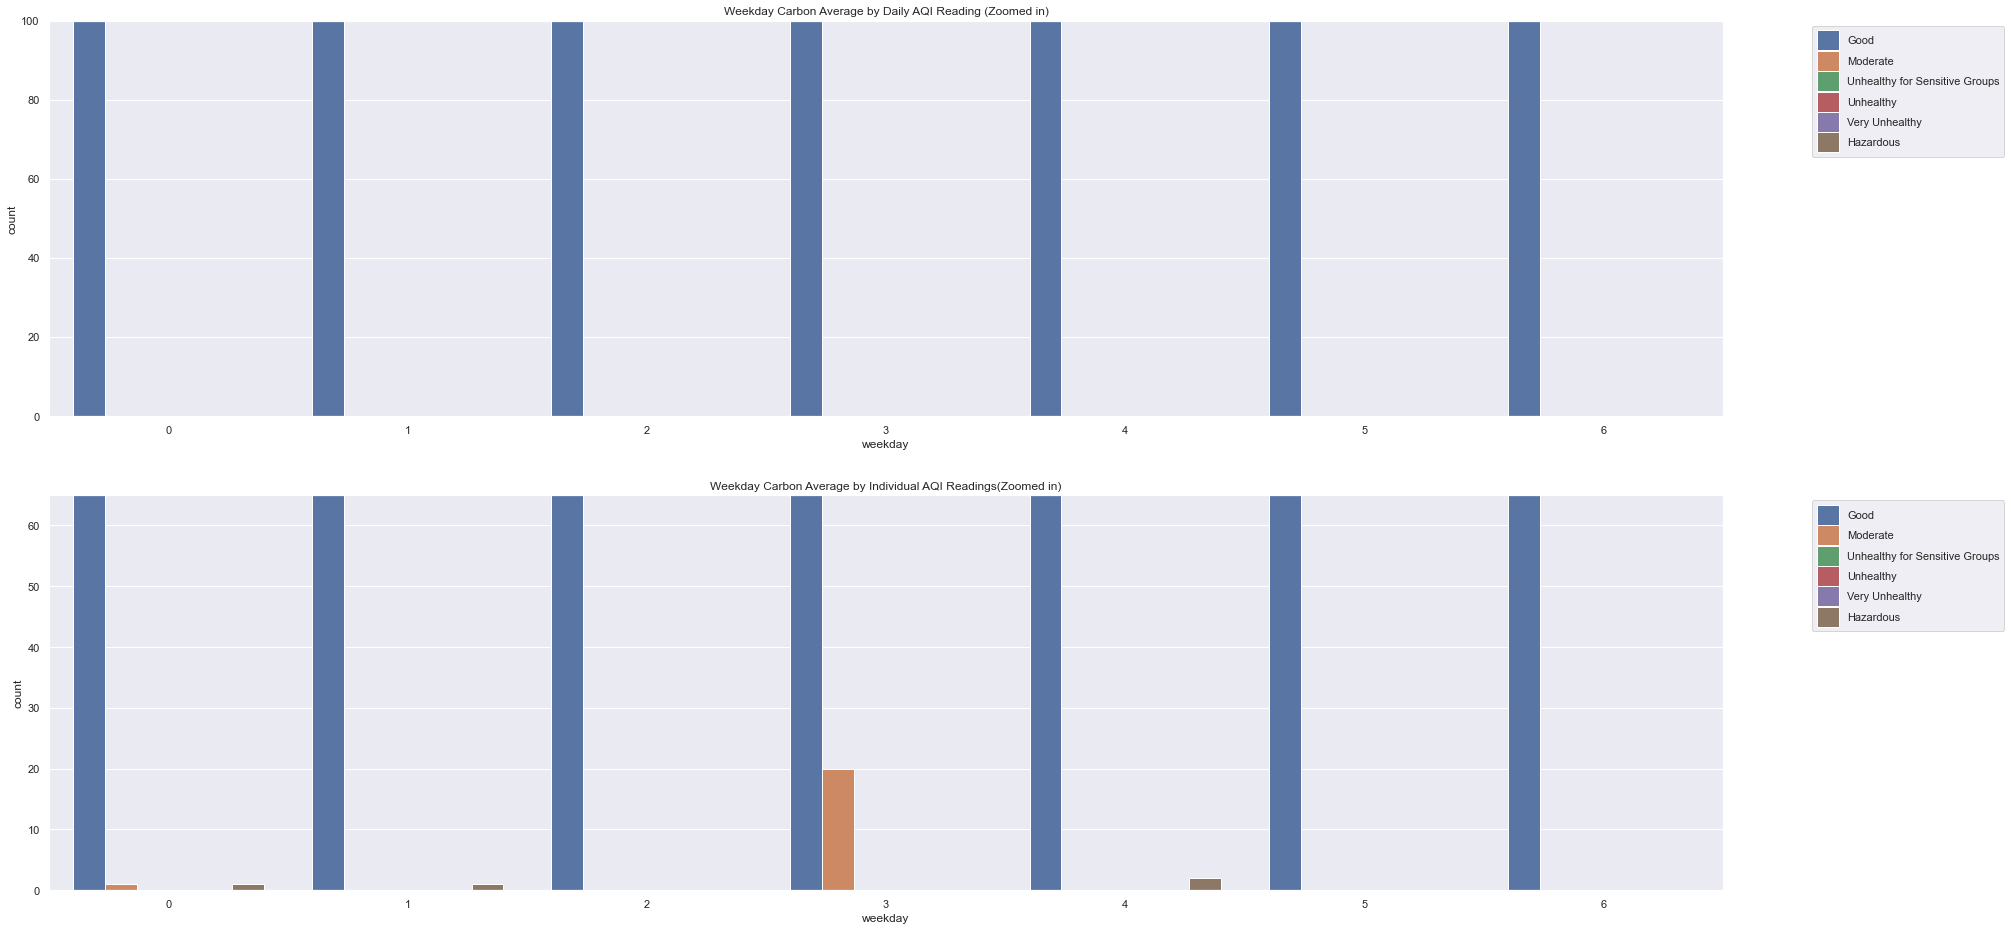

In [54]:
plt.subplots(2,1, figsize=(30,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
plot = sns.countplot(data=air, x='weekday', hue='AQI_CO_24hr')
plt.title('Weekday Carbon Average by Daily AQI Reading (Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 100))

plt.subplot(2,1,2)
plot = sns.countplot(data=air, x='weekday', hue='AQI_CO')
plt.title('Weekday Carbon Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 65))

### Takeaways:
- Fridays and Sundays have the hightest average Carbon Monoxide readings
- There are significantly more readings in the good range than any other
    - In fact there are only good readings when it comes to daily averages
- For individual readings 
    - Sunday has the most Hazerdous readings
    - Friday has some unhealthy readings and Saturday has some hazerdous readings
___

Text(0.5, 1.0, 'Weekday PM 2.5 Average by Individual AQI Readings')

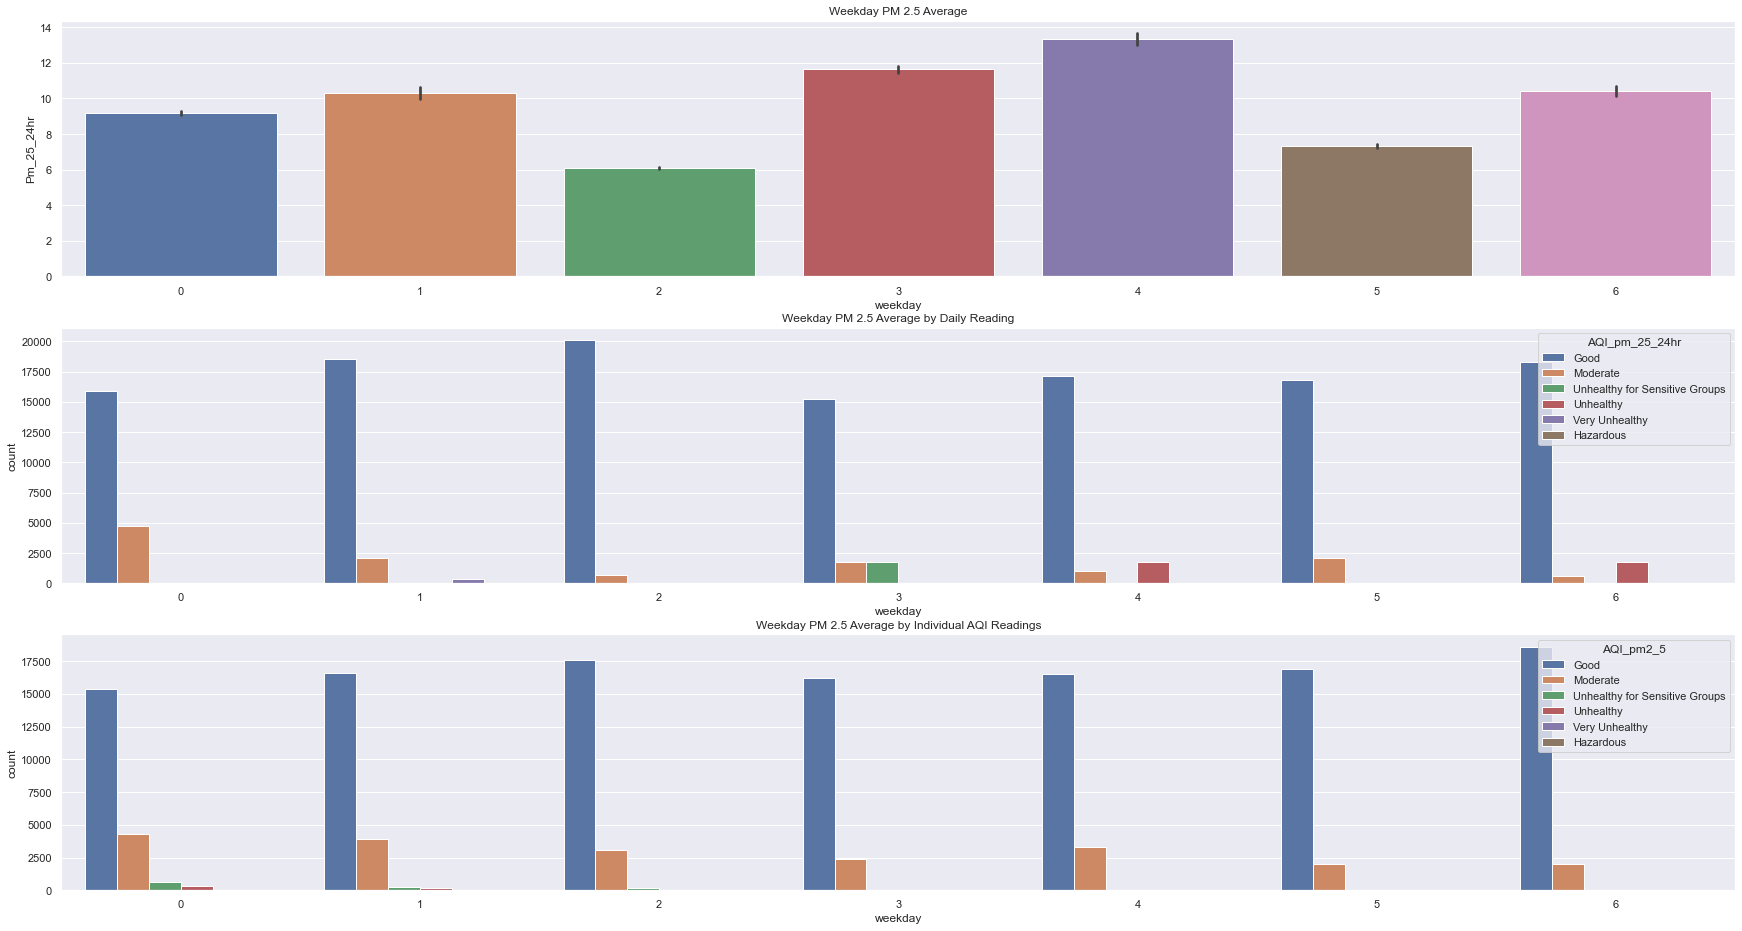

In [55]:
plt.subplots(3,1, figsize=(30,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(3,1,1)
sns.barplot(data=air, x='weekday', y='Pm_25_24hr')
plt.title('Weekday PM 2.5 Average')

plt.subplot(3,1,2)
sns.countplot(data=air, x='weekday', hue='AQI_pm_25_24hr')
plt.title('Weekday PM 2.5 Average by Daily Reading')

plt.subplot(3,1,3)
sns.countplot(data=air, x='weekday', hue='AQI_pm2_5')
plt.title('Weekday PM 2.5 Average by Individual AQI Readings')

[(0.0, 600.0)]

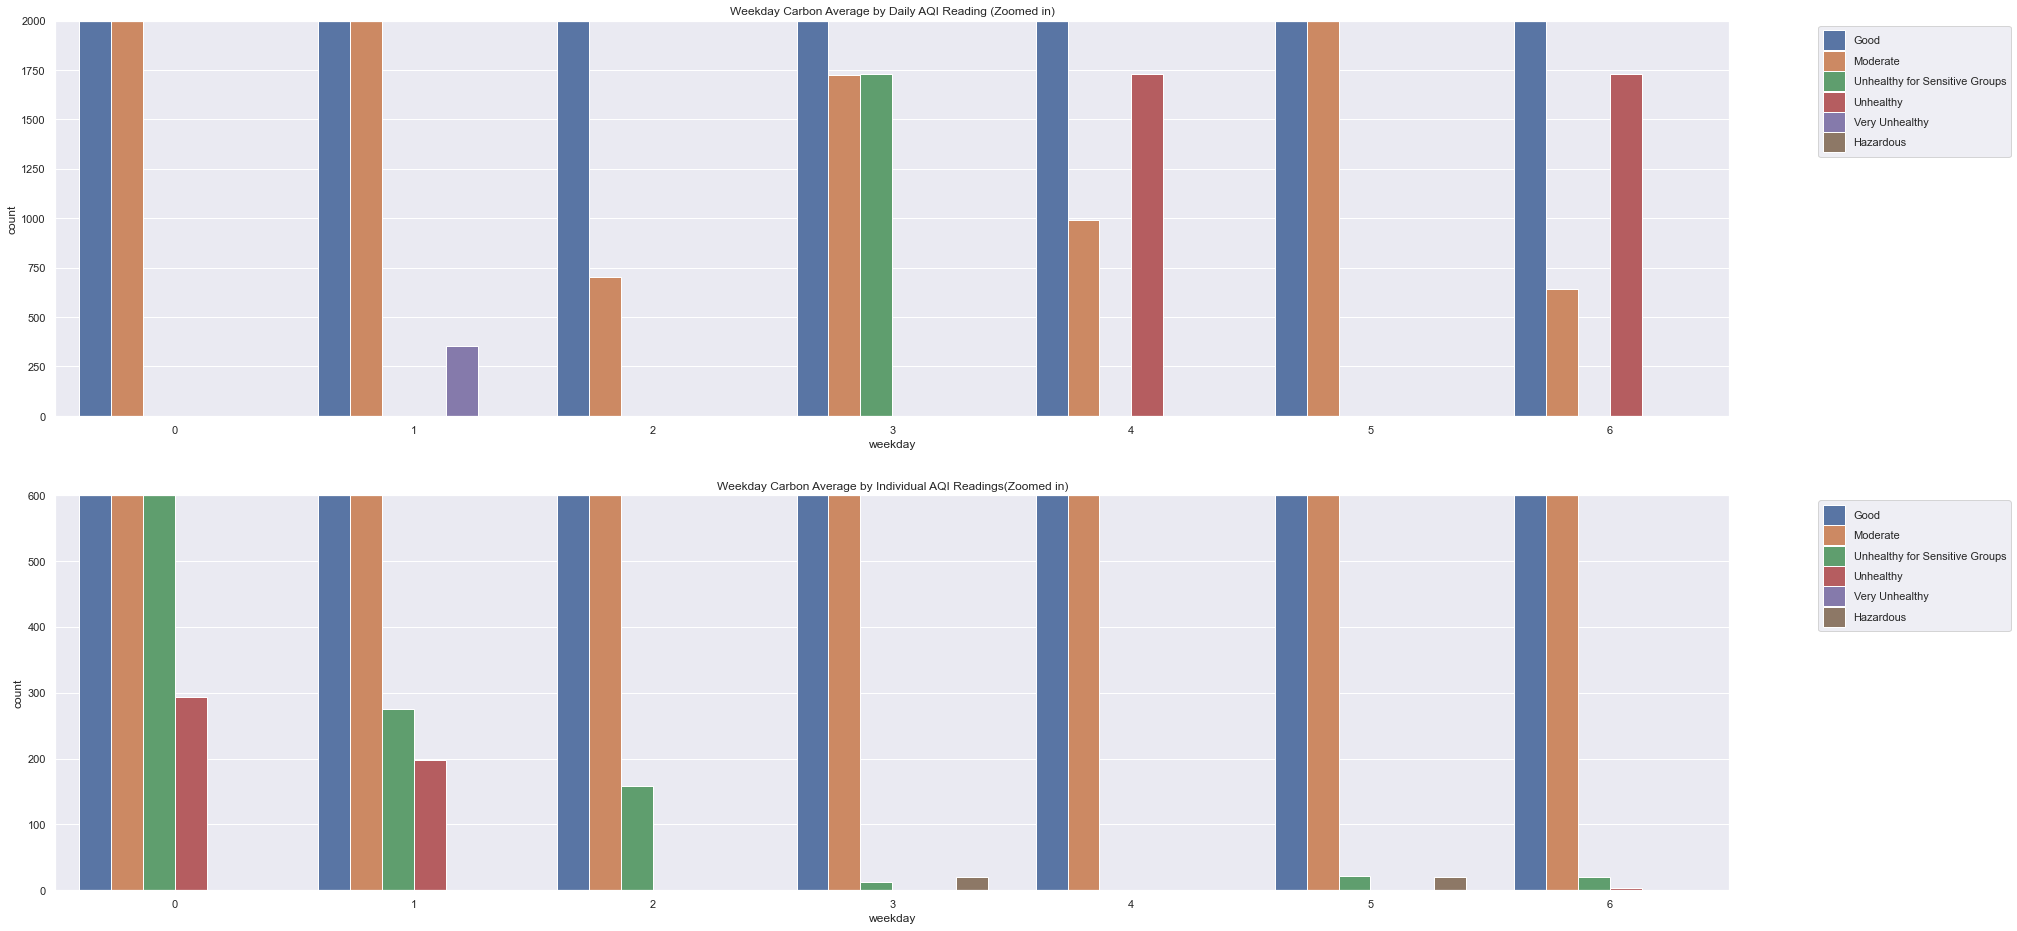

In [56]:
plt.subplots(2,1, figsize=(30,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
plot = sns.countplot(data=air, x='weekday', hue='AQI_pm_25_24hr')
plt.title('Weekday Carbon Average by Daily AQI Reading (Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 2000))

plt.subplot(2,1,2)
plot =sns.countplot(data=air, x='weekday', hue='AQI_pm2_5')
plt.title('Weekday Carbon Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 600))

### Takeaways:
- Friday and Saturday have more unhealthy readings for the day than any other day.
- Monday and Tuesday have more individual unhealthy readings
___

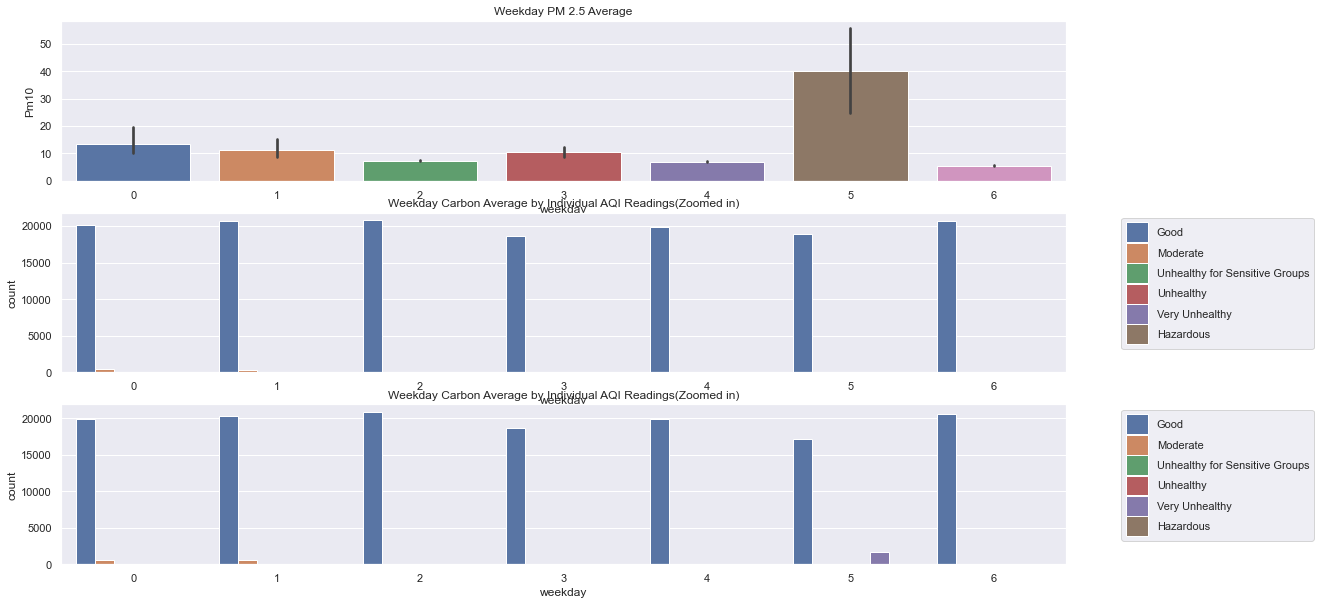

In [57]:
plt.subplots(3,1, figsize=(18,10), sharey=True)
sns.set(style="darkgrid")

plt.subplot(3,1,1)
sns.barplot(data=air, x='weekday', y='Pm10')
plt.title('Weekday PM 2.5 Average')

plt.subplot(3,1,2)
sns.countplot(data=air, x='weekday', hue='AQI_pm10')
plt.title('Weekday PM 2.5 Average')
plt.title('Weekday Carbon Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

plt.subplot(3,1,3)
sns.countplot(data=air, x='weekday', hue='AQI_pm10_24hr')
plt.title('Weekday PM 2.5 Average by Individual AQI Readings')
plt.title('Weekday Carbon Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

[(0.0, 20.0)]

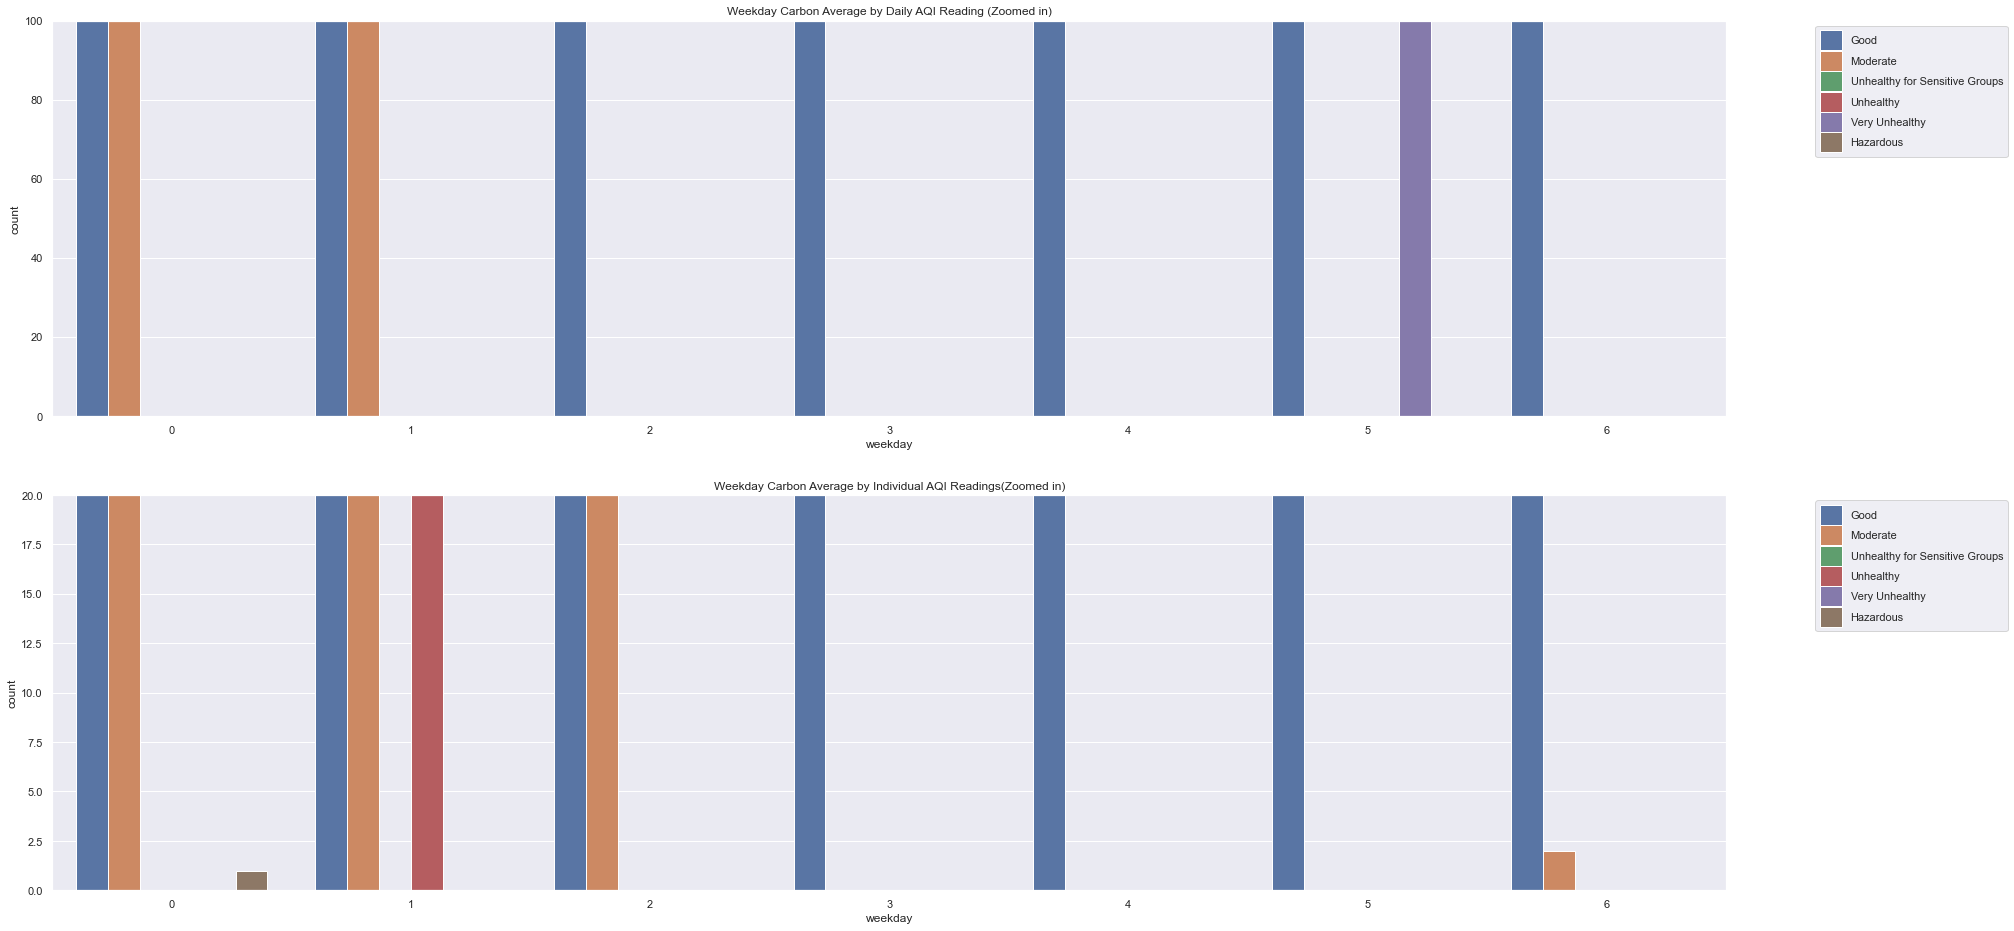

In [58]:
plt.subplots(2,1, figsize=(30,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
plot = sns.countplot(data=air, x='weekday', hue='AQI_pm10_24hr')
plt.title('Weekday Carbon Average by Daily AQI Reading (Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 100))

plt.subplot(2,1,2)
plot =sns.countplot(data=air, x='weekday', hue='AQI_pm10')
plt.title('Weekday Carbon Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 20))

### Takeaways:
- PM10 has no readings that are unhealthy or hazerdous in either daily or individual readings

___

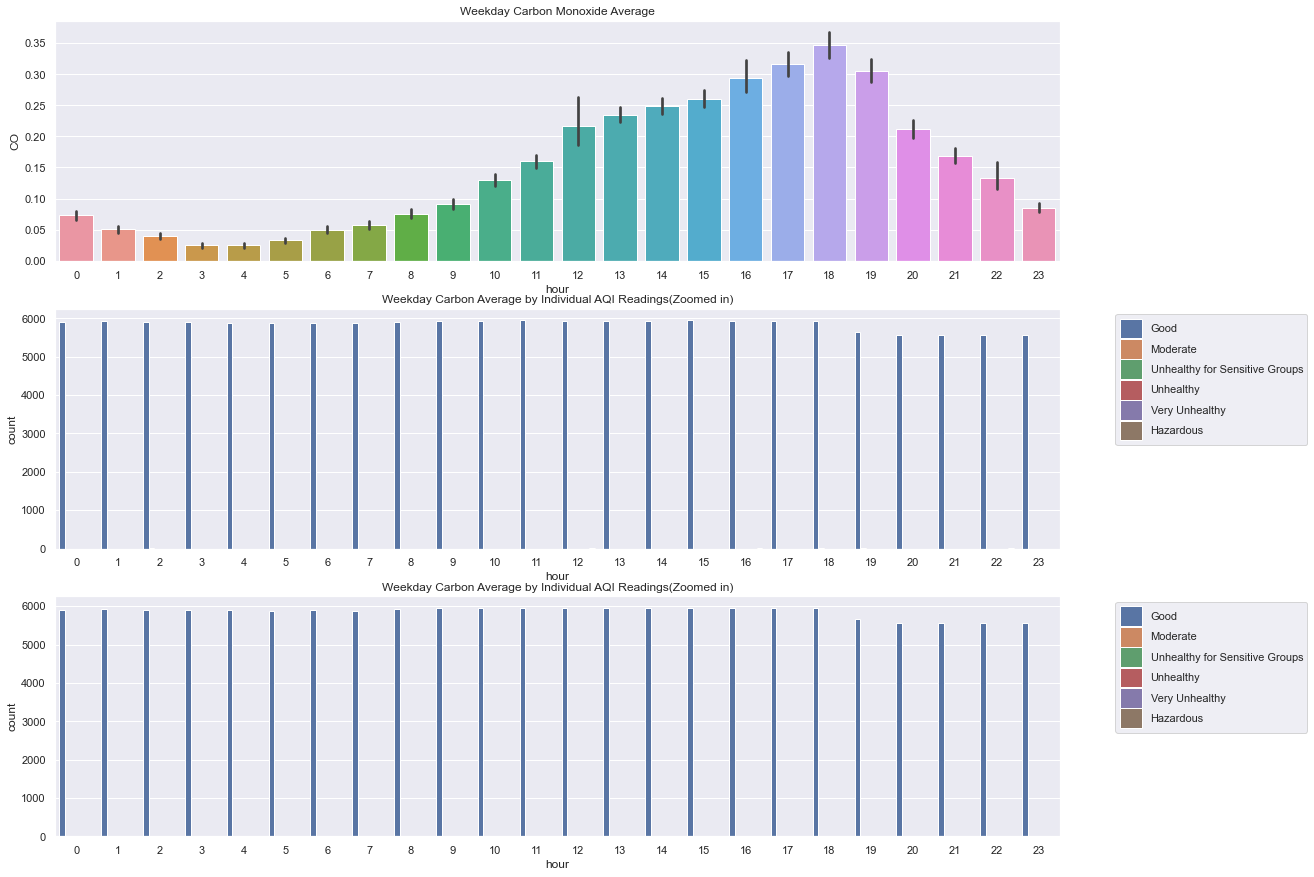

In [59]:
plt.subplots(3,1, figsize=(18,15), sharey=True)
sns.set(style="darkgrid")

plt.subplot(3,1,1)
sns.barplot(data=air, x='hour', y='CO')
plt.title('Weekday Carbon Monoxide Average')

plt.subplot(3,1,2)
sns.countplot(data=air, x='hour', hue='AQI_CO')
plt.title('Weekday CO Average by Individual AQI Readings')
plt.title('Weekday Carbon Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

plt.subplot(3,1,3)
sns.countplot(data=air, x='hour', hue='AQI_CO_24hr')
plt.title('Weekday PM 2.5 Average by Daily AQI Readings')
plt.title('Weekday Carbon Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

[(0.0, 30.0)]

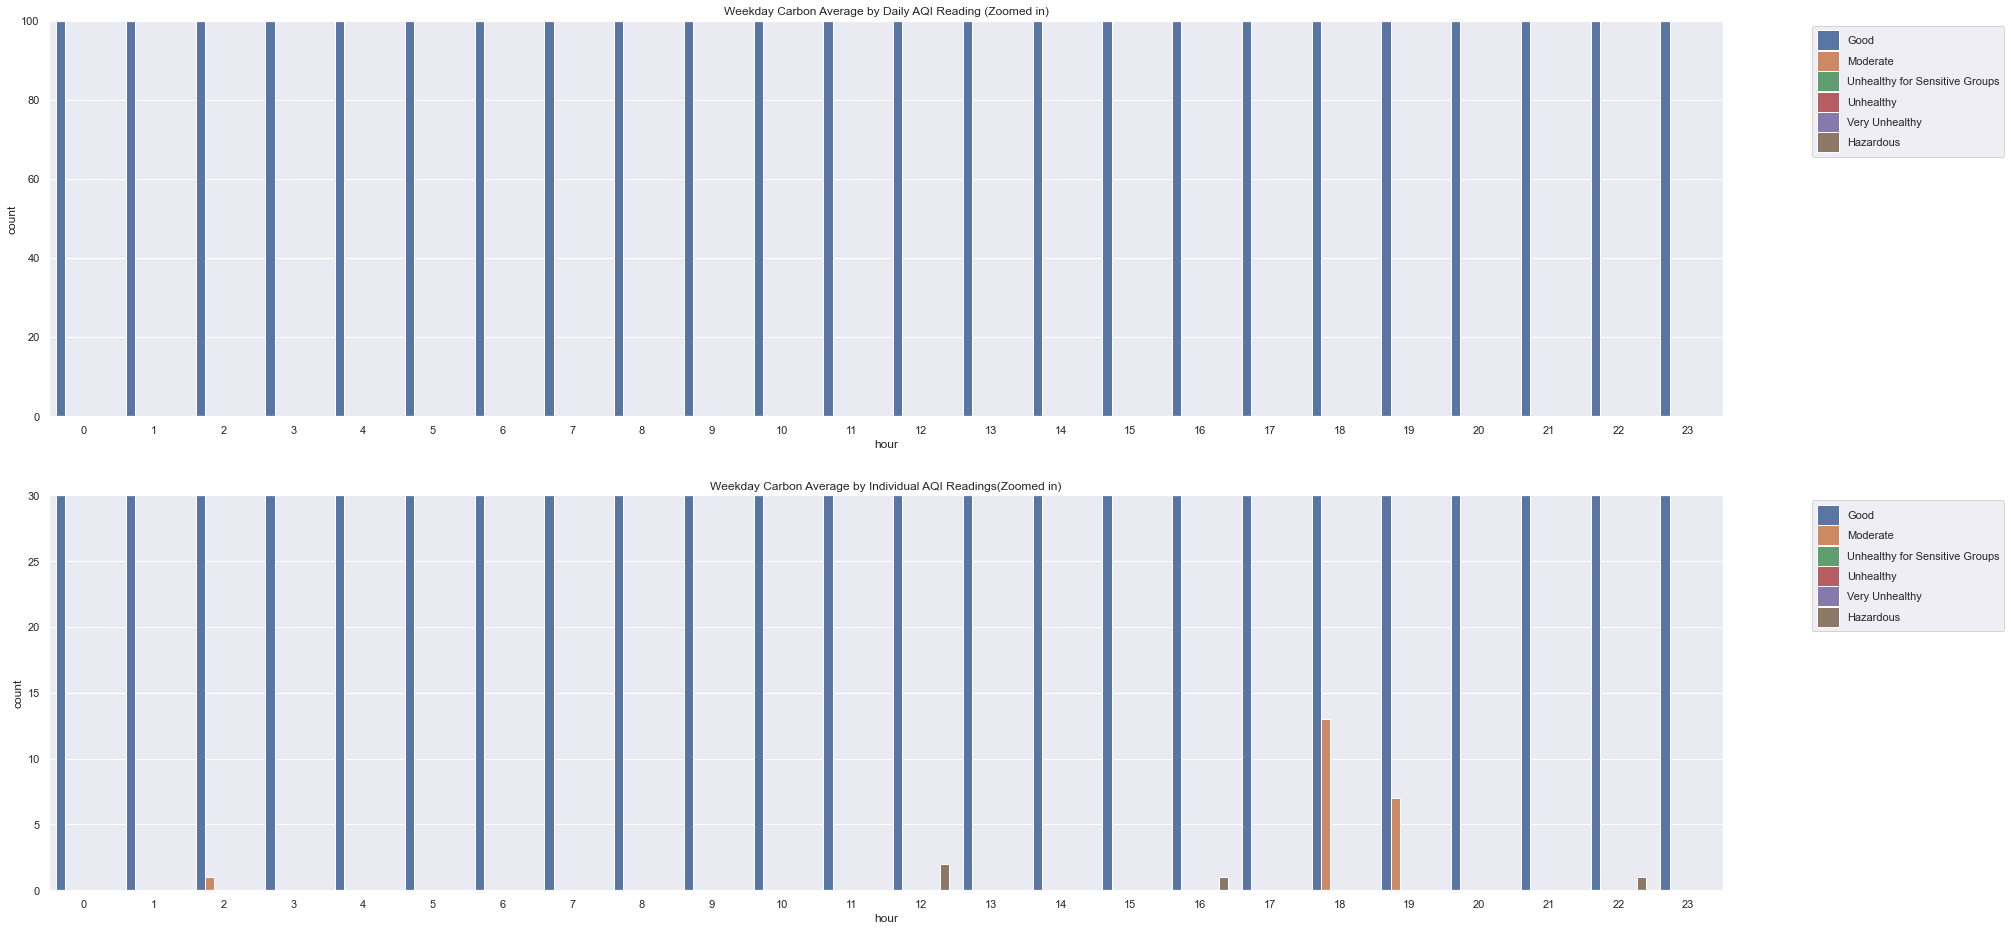

In [60]:
plt.subplots(2,1, figsize=(30,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
plot = sns.countplot(data=air, x='hour', hue='AQI_CO_24hr')
plt.title('Weekday Carbon Average by Daily AQI Reading (Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 100))

plt.subplot(2,1,2)
plot =sns.countplot(data=air, x='hour', hue='AQI_CO')
plt.title('Weekday Carbon Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 30))

### Takeaways:
- 5 and 6 am have the most hazerdous reading throughout the day. But there are still more readings in the good range.
- There are no daily averages outside of good air quality
___

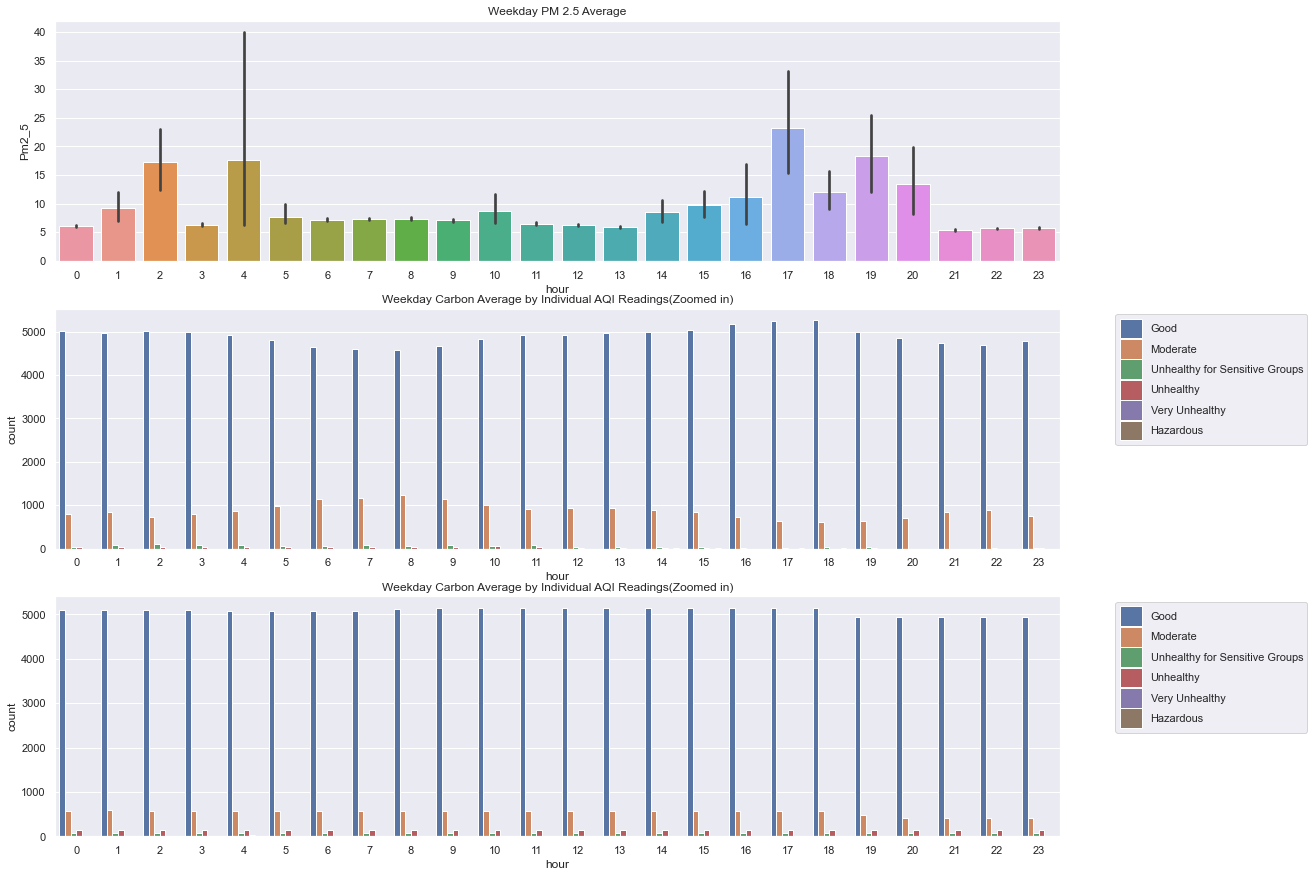

In [61]:
plt.subplots(3,1, figsize=(18,15), sharey=True)
sns.set(style="darkgrid")

plt.subplot(3,1,1)
sns.barplot(data=air, x='hour', y='Pm2_5')
plt.title('Weekday PM 2.5 Average')

plt.subplot(3,1,2)
sns.countplot(data=air, x='hour', hue='AQI_pm2_5')
plt.title('Weekday PM 2.5 Average by Individual AQI Readings')
plt.title('Weekday Carbon Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

plt.subplot(3,1,3)
sns.countplot(data=air, x='hour', hue='AQI_pm_25_24hr')
plt.title('Weekday PM 2.5 Average by Daily AQI Readings')
plt.title('Weekday Carbon Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

[(0.0, 10.0)]

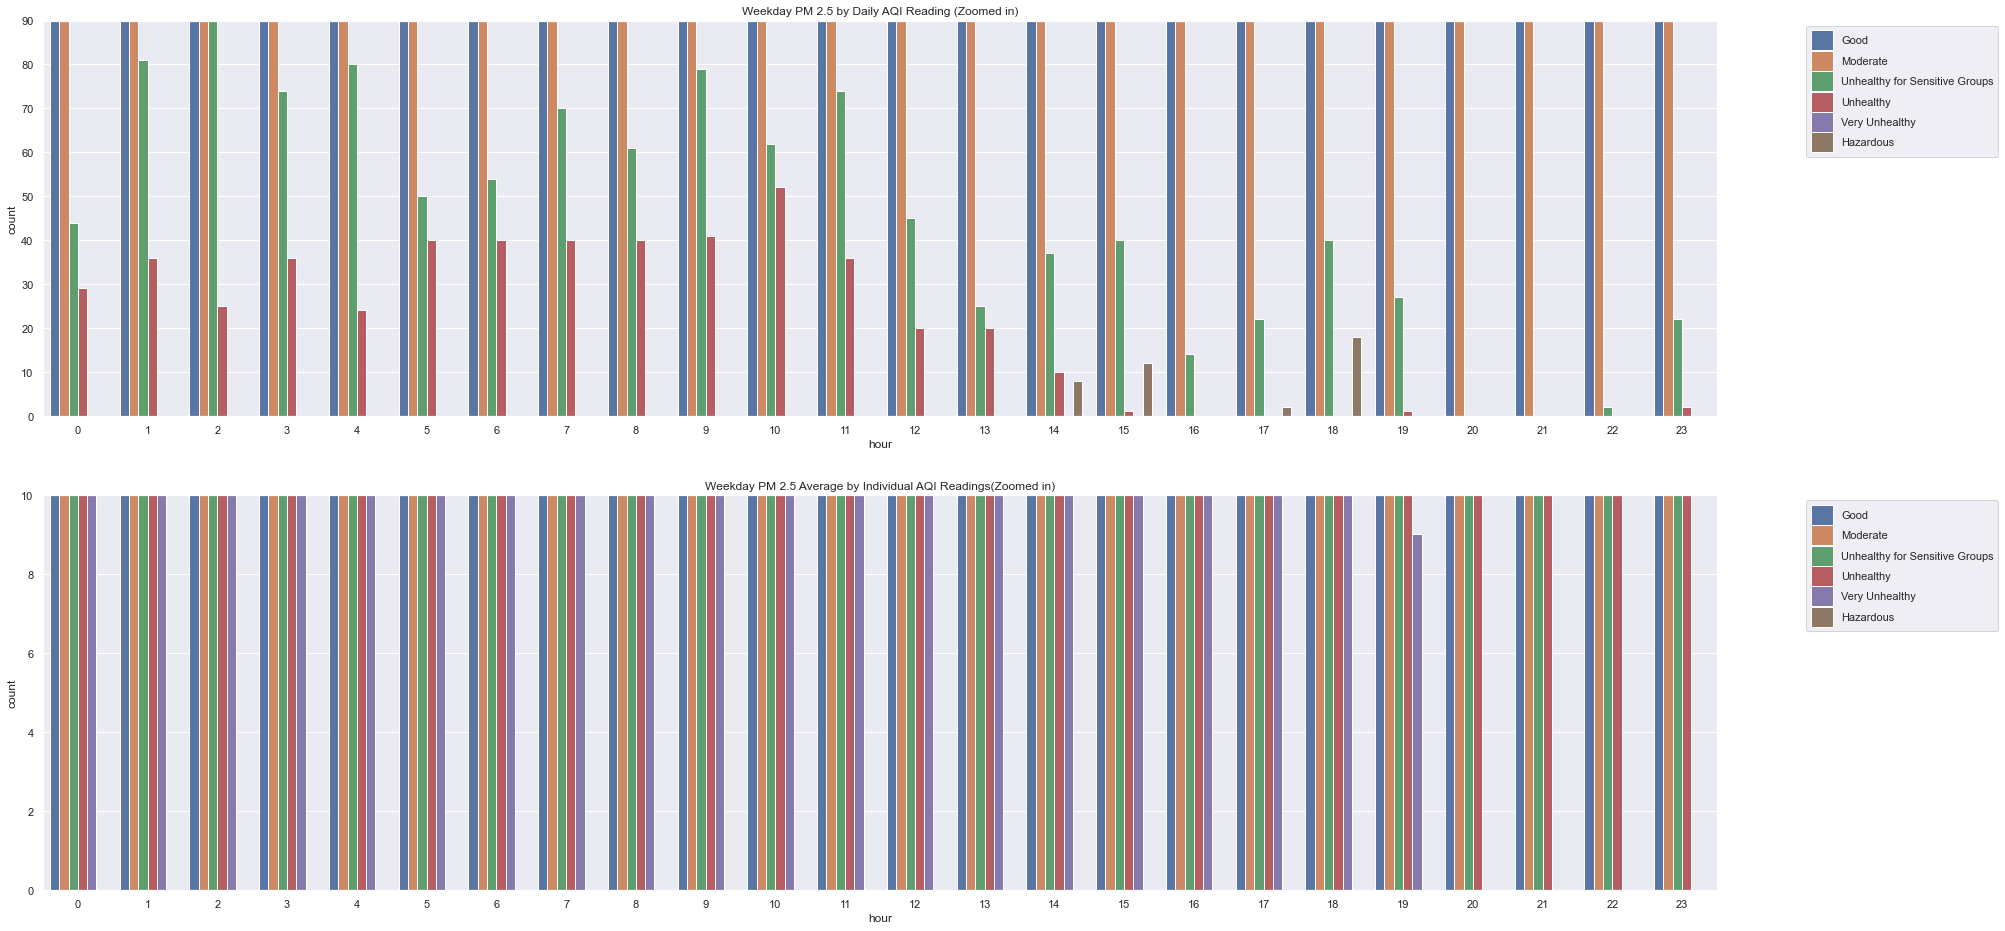

In [62]:
plt.subplots(2,1, figsize=(30,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
plot = sns.countplot(data=air, x='hour', hue='AQI_pm2_5')
plt.title('Weekday PM 2.5 by Daily AQI Reading (Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 90))

plt.subplot(2,1,2)
plot =sns.countplot(data=air, x='hour', hue='AQI_pm_25_24hr')
plt.title('Weekday PM 2.5 Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 10))

### Takeaways:
- 2 pm has the highest average pm 2.5 reading
- Peak hours for unhealthy readings is 3 am, 8 am, and 11am
___

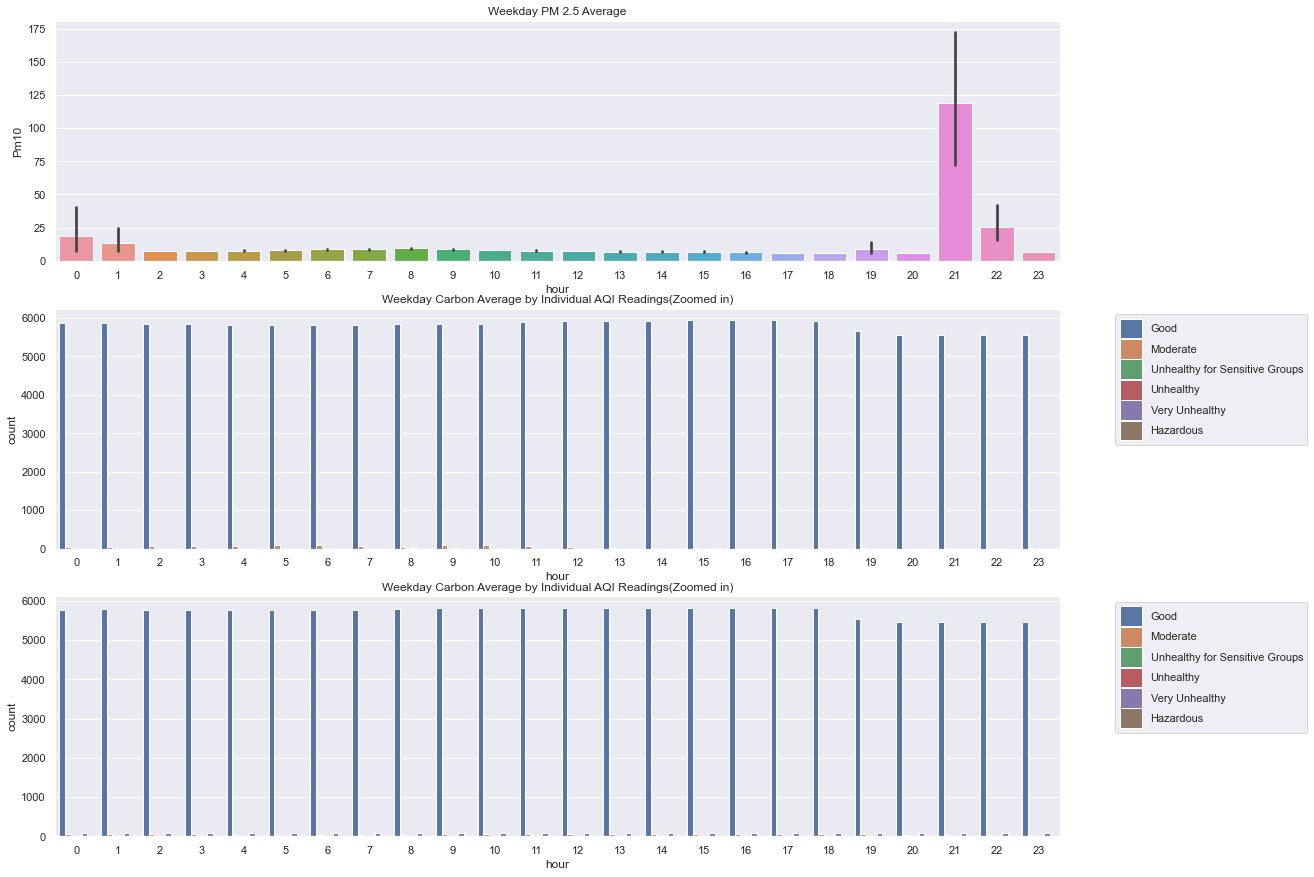

In [63]:
plt.subplots(3,1, figsize=(18,15), sharey=True)
sns.set(style="darkgrid")

plt.subplot(3,1,1)
sns.barplot(data=air, x='hour', y='Pm10')
plt.title('Weekday PM 2.5 Average')

plt.subplot(3,1,2)
sns.countplot(data=air, x='hour', hue='AQI_pm10')
plt.title('Weekday PM 2.5 Average by Individual AQI Readings')
plt.title('Weekday Carbon Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

plt.subplot(3,1,3)
sns.countplot(data=air, x='hour', hue='AQI_pm10_24hr')
plt.title('Weekday PM 2.5 Average by Daily AQI Readings')
plt.title('Weekday Carbon Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

[(0.0, 10.0)]

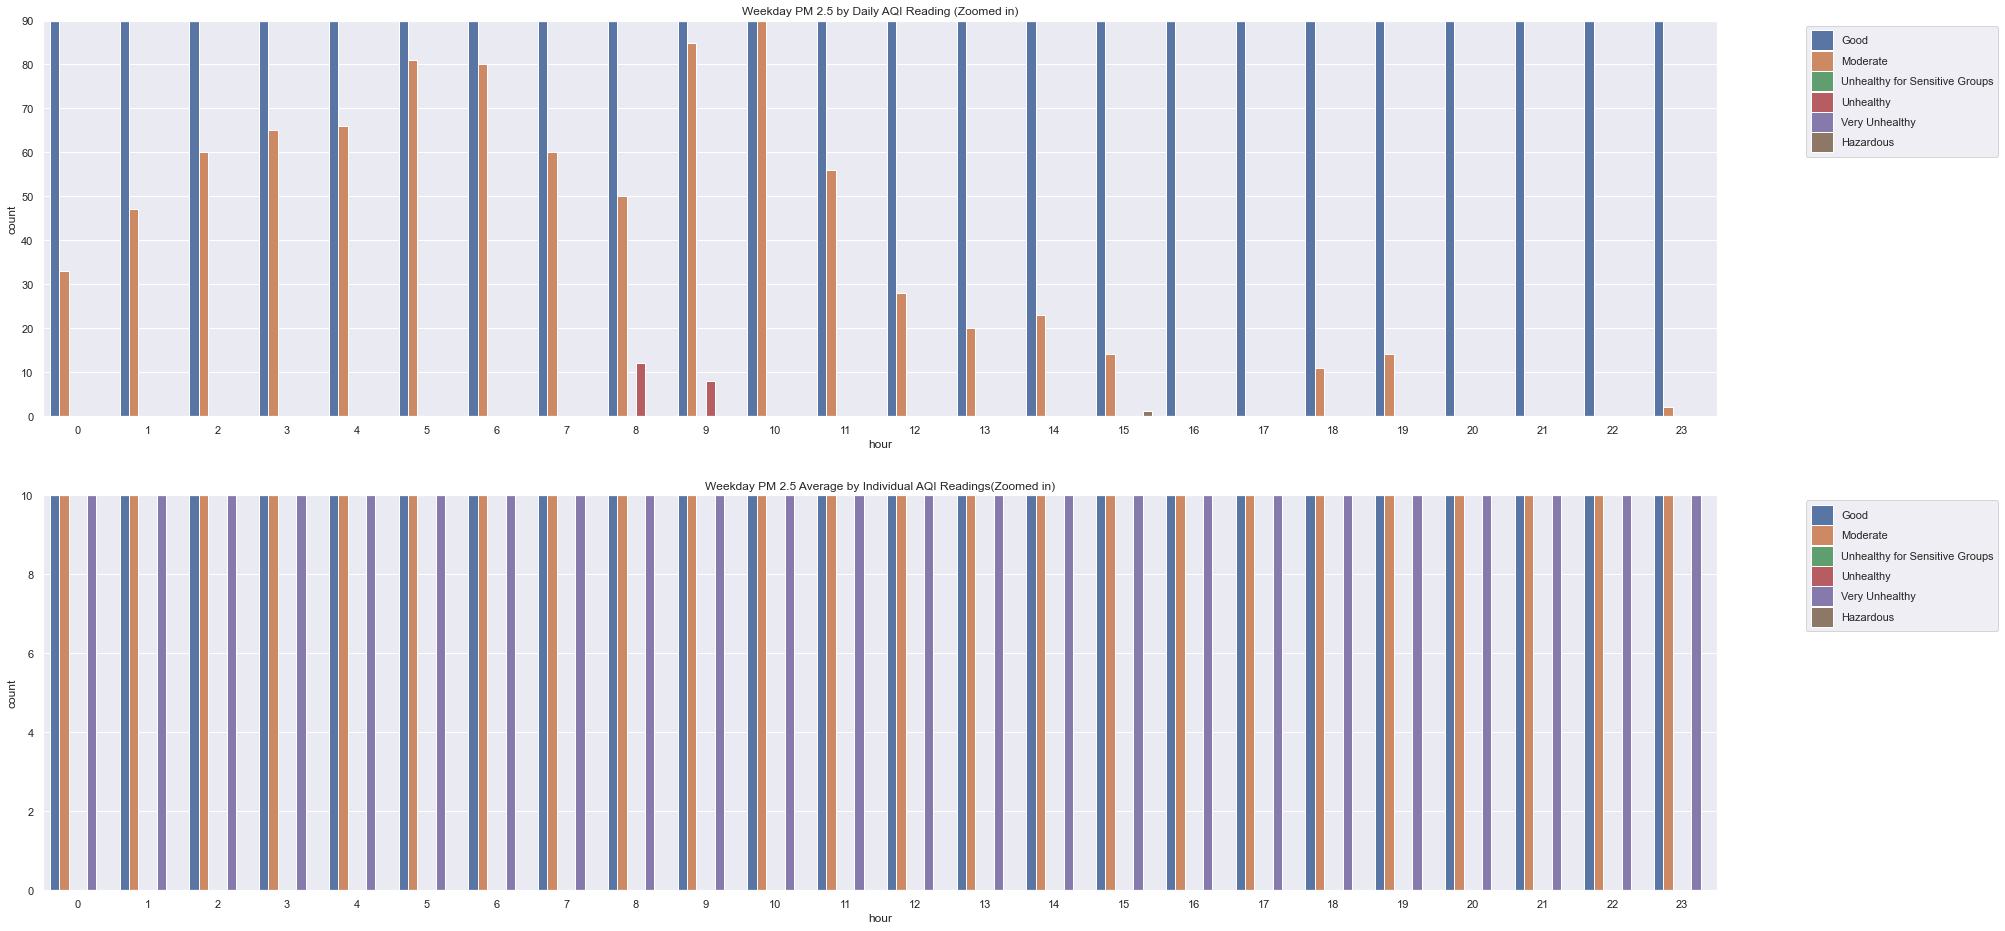

In [64]:
plt.subplots(2,1, figsize=(30,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
plot = sns.countplot(data=air, x='hour', hue='AQI_pm10')
plt.title('Weekday PM 2.5 by Daily AQI Reading (Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 90))

plt.subplot(2,1,2)
plot =sns.countplot(data=air, x='hour', hue='AQI_pm10_24hr')
plt.title('Weekday PM 2.5 Average by Individual AQI Readings(Zoomed in)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)
plot.set(ylim=(0, 10))

### Takeaways:
- nothing crazy here

# Test out New Alert System

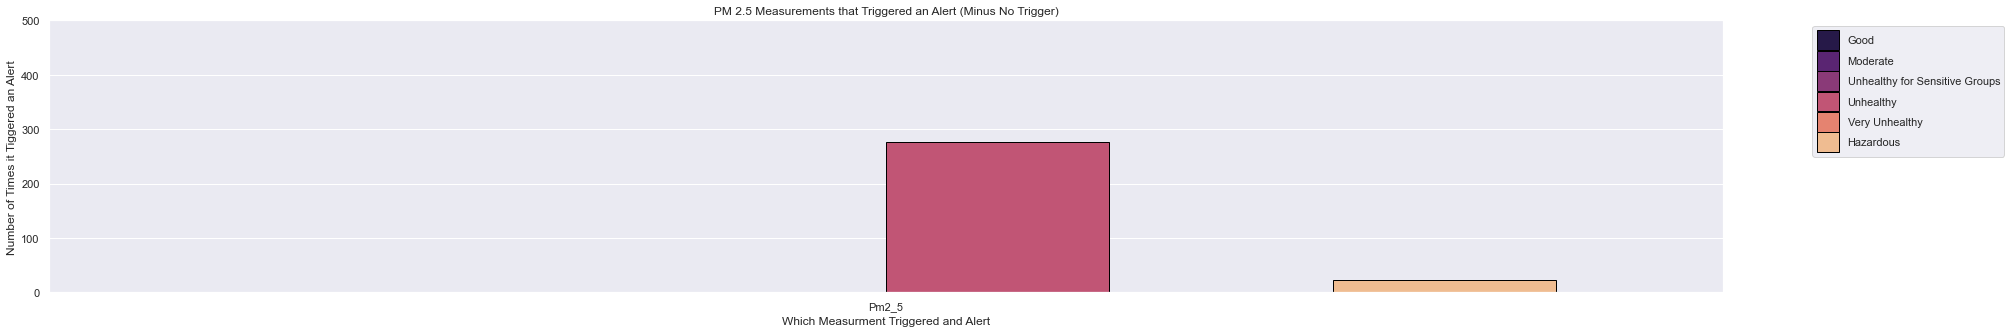

In [65]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='unhealthy_alert', hue='AQI_pm2_5', palette='magma',edgecolor='black')
plot.set(xlim=(0.5, 1.5))
plot.set(ylim=(0, 500))
plt.title('PM 2.5 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

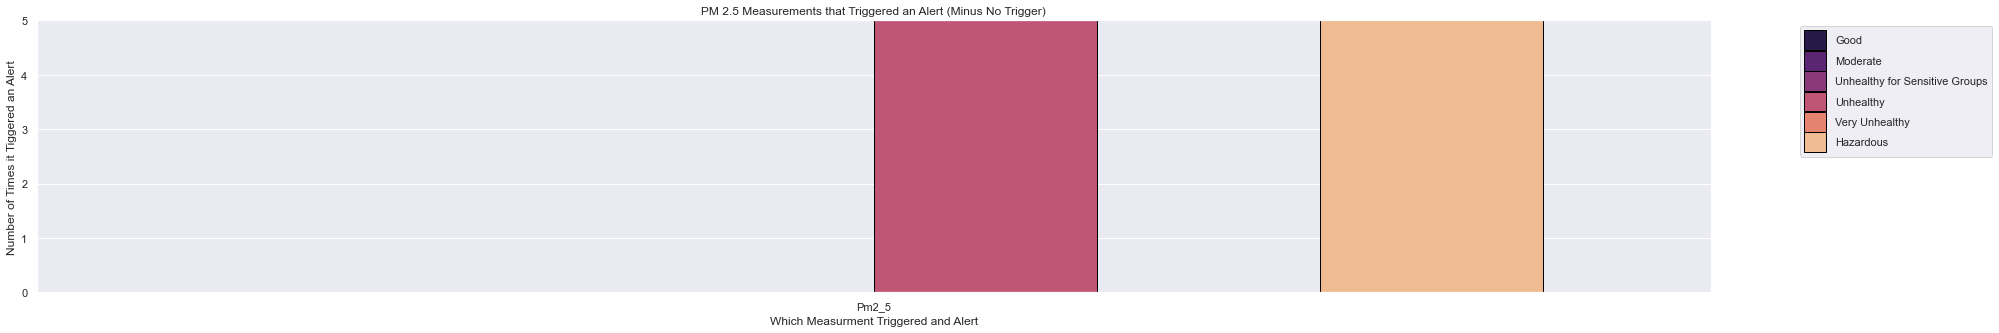

In [66]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='unhealthy_alert', hue='AQI_pm2_5', palette='magma',edgecolor='black')
plot.set(xlim=(0.5, 1.5))
plot.set(ylim=(0, 5))
plt.title('PM 2.5 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

In [67]:
air.AQI_pm2_5.value_counts()

Good                              117752
Moderate                           21005
Unhealthy for Sensitive Groups      1113
Unhealthy                            493
Hazardous                             40
Very Unhealthy                         0
Name: AQI_pm2_5, dtype: int64

### Takeaways:
- Still is not picking up my 1 hazerdous reading for some reason
___

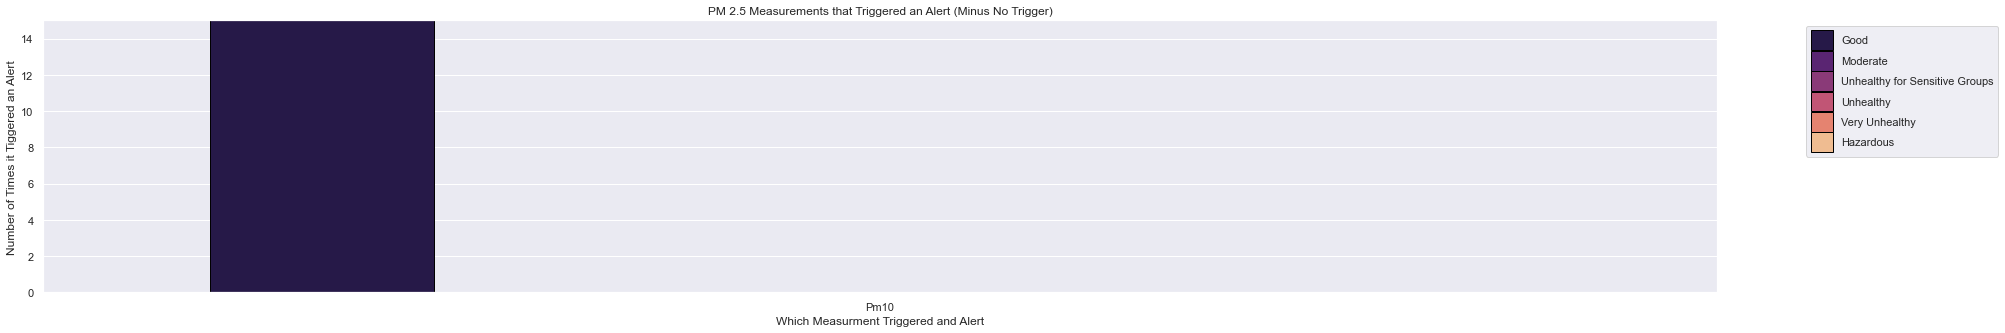

In [68]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='unhealthy_alert', hue='AQI_CO', palette='magma',edgecolor='black')
plot.set(xlim=(1.5, 2.5))
plot.set(ylim=(0, 15))
plt.title('PM 2.5 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

In [69]:
air.AQI_CO.value_counts()

Good                              140444
Moderate                              21
Hazardous                              4
Very Unhealthy                         0
Unhealthy                              0
Unhealthy for Sensitive Groups         0
Name: AQI_CO, dtype: int64

### Takeaways:
- Still is not picking up my 1 unhealthy reading for some reason
___

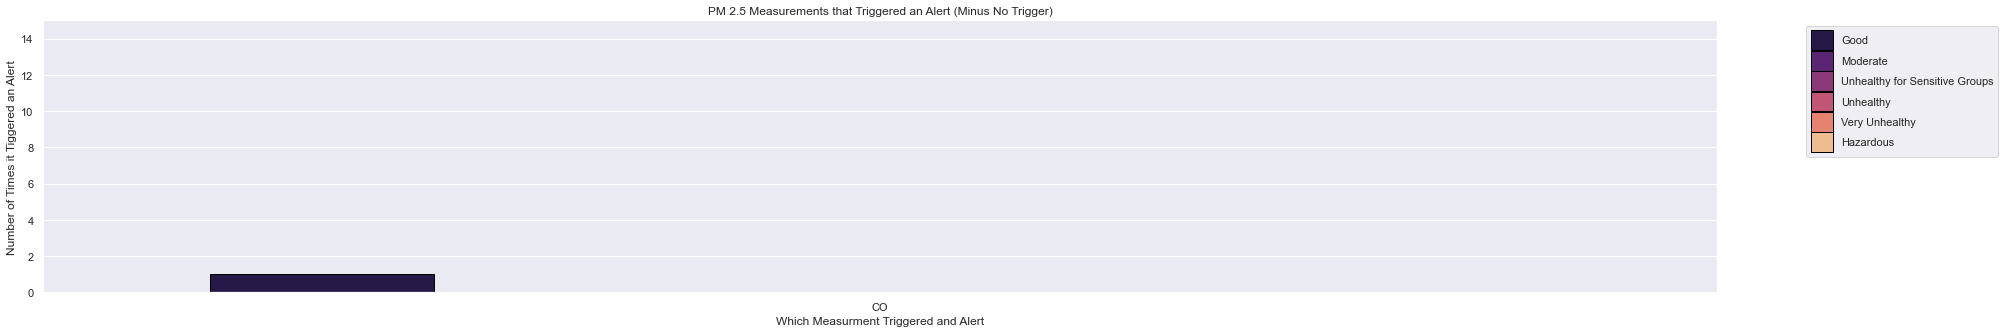

In [70]:
plt.figure(figsize=(30,5))
plot = sns.countplot(data=air_train, x='unhealthy_alert', hue='AQI_pm10', palette='magma',edgecolor='black')
plot.set(xlim=(2.5, 3.5))
plot.set(ylim=(0, 15))
plt.title('PM 2.5 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

In [71]:
air.AQI_pm10.value_counts()

Good                              139520
Moderate                             885
Unhealthy                             20
Hazardous                              1
Very Unhealthy                         0
Unhealthy for Sensitive Groups         0
Name: AQI_pm10, dtype: int64

___